In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Calendar.csv")
customers = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Customers.csv")
products = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Products.csv")
regions = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Regions.csv")
returns = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Returns_1997-1998.csv")
stores = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Stores.csv")
transaction_97 = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Transactions_1997.csv")
transaction_98 = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Maven Market/Dataset/MavenMarket_Transactions_1998.csv")

In [ ]:
calendar.head()

In [3]:
calendar.dtypes

date    object
dtype: object

In [4]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [ ]:
customers.head()

In [ ]:
customers.dtypes

In [5]:
customers['first_name'] = customers.first_name.str.strip()
customers['last_name'] = customers.last_name.str.strip()

In [6]:
customers['Name'] = customers['first_name'] + ' ' + customers['last_name']

In [7]:
customers.drop(['first_name', 'last_name'], axis = 1, inplace = True)

In [8]:
customers['birthdate'] = pd.to_datetime(customers['birthdate'])

In [ ]:
customers.yearly_income.unique()

In [9]:
import regex
customers['yearly_income'] = customers.yearly_income.str.replace("$", '', regex=False).str.replace('K', '', regex=False)

In [10]:
customers['yearly_income'] = customers.yearly_income.str.replace('+', '')

In [11]:
split_col = customers['yearly_income'].str.split('-', expand = True)
split_col_names = ['l', 'h']
split_col[0] = split_col[0].str.strip().astype(float)
split_col[1] = split_col[1].str.strip().astype(float)
customers['yearly_income'] = ((split_col[0] + split_col[1]) / 2) * 1000

In [12]:
customers['yearly_income'] = customers['yearly_income'].fillna(150000.0)

In [ ]:
customers.yearly_income

In [13]:
customers['acct_open_date'] = pd.to_datetime(customers['acct_open_date'])

In [ ]:
products.head()

In [ ]:
products.dtypes

In [14]:
products['product_sku'] = products.product_sku.astype(object)

In [ ]:
# It won't work since NaN is not string datatype
# products['recyclable'] = products.recyclable.map({NaN : "No", 1.0 : "Yes"}).astype(object)
# products['low_fat'] = products.low_fat.map({NaN : "No", 1.0 : "Yes"}).astype(object)

In [15]:
products['recyclable'] = products.recyclable.astype(str)
products['low_fat'] = products.low_fat.astype(str)

In [16]:
products['recyclable'] = products.recyclable.str.replace('nan', 'No').replace('1.0', 'Yes')
products['low_fat'] = products.low_fat.str.replace('nan', 'No').replace('1.0', 'Yes')

In [ ]:
regions.head()

In [ ]:
regions.dtypes

In [ ]:
returns.head()

In [ ]:
returns.dtypes

In [17]:
returns['return_date'] = pd.to_datetime(returns['return_date'])

In [ ]:
stores.head()

In [ ]:
stores.dtypes

In [18]:
stores['first_opened_date'] = pd.to_datetime(stores['first_opened_date'])
stores['last_remodel_date'] = pd.to_datetime(stores['last_remodel_date'])

In [ ]:
transaction_97.head()

In [ ]:
transaction_97.dtypes

In [19]:
transaction_97['transaction_date'] = pd.to_datetime(transaction_97['transaction_date'])
transaction_97['stock_date'] = pd.to_datetime(transaction_97['stock_date'])

In [ ]:
transaction_98.head()

In [ ]:
transaction_98.dtypes

In [20]:
transaction_98['transaction_date'] = pd.to_datetime(transaction_98['transaction_date'])
transaction_98['stock_date'] = pd.to_datetime(transaction_98['stock_date'])

In [ ]:
calendar.shape

In [ ]:
customers.shape

In [ ]:
products.shape

In [ ]:
regions.shape

In [ ]:
returns.shape

In [ ]:
stores.shape

In [ ]:
transaction_97.shape

In [ ]:
transaction_98.shape

In [ ]:
calendar.isnull().sum()

In [ ]:
customers.isnull().sum()

In [21]:
customers['Name'] = customers.Name.fillna("Unknown")

In [ ]:
products.isnull().sum()

In [ ]:
regions.isnull().sum()

In [ ]:
returns.isnull().sum()

In [ ]:
stores.isnull().sum()

In [ ]:
transaction_97.isnull().sum()

In [ ]:
transaction_98.isnull().sum()

# Questions

### I. Descriptive Analysis

##### 1. Customer & Sales Overview 

In [ ]:
# a.  What is the total sales, total profit, and average order quantity by:  
#     i. Month,   ii. Region,    iii. Store Type and      iv. Product Brand

In [22]:
cx_sales_overview_97 = pd.merge(transaction_97, calendar, left_on = 'transaction_date', right_on = 'date', how = 'left')
cx_sales_overview_98 = pd.merge(transaction_98, calendar, left_on = 'transaction_date', right_on = 'date', how = 'left')

cx_sales_overview_97 = pd.merge(cx_sales_overview_97, products[['product_id', 'product_retail_price', 'product_cost', 'product_brand']], on = 'product_id', how = 'left')
cx_sales_overview_97 = pd.merge(cx_sales_overview_97, stores[['store_id', 'region_id', 'store_type']], on = 'store_id', how = 'left')
cx_sales_overview_98 = pd.merge(cx_sales_overview_98, products[['product_id', 'product_retail_price', 'product_cost', 'product_brand']], on = 'product_id', how = 'left')
cx_sales_overview_98 = pd.merge(cx_sales_overview_98, stores[['store_id', 'region_id', 'store_type']], on = 'store_id', how = 'left')

In [23]:
cx_sales_overview_97['sales'] = cx_sales_overview_97['quantity'] * cx_sales_overview_97['product_retail_price']
cx_sales_overview_97['profit'] = (cx_sales_overview_97['product_retail_price'] - cx_sales_overview_97['product_cost']) * cx_sales_overview_97['quantity']
# cx_sales_overview_97.head()

In [24]:
cx_sales_overview_98['sales'] = cx_sales_overview_98['quantity'] * cx_sales_overview_98['product_retail_price']
cx_sales_overview_98['profit'] = (cx_sales_overview_98['product_retail_price'] - cx_sales_overview_98['product_cost']) * cx_sales_overview_98['quantity']
# cx_sales_overview_98.head()

In [25]:
# a. i. Month
month_97 = cx_sales_overview_97.transaction_date.dt.month_name()
month_98 = cx_sales_overview_98.transaction_date.dt.month_name()

monthly_total_sales_97 = cx_sales_overview_97.groupby(month_97).sales.sum()
monthly_total_profit_97 = cx_sales_overview_97.groupby(month_97).profit.sum()
monthly_avg_order_quantity_97 = cx_sales_overview_97.groupby(month_97).quantity.mean()

monthly_total_sales_98 = cx_sales_overview_98.groupby(month_98).sales.sum()
monthly_total_profit_98 = cx_sales_overview_98.groupby(month_98).profit.sum()
monthly_avg_order_quantity_98 = cx_sales_overview_98.groupby(month_98).quantity.mean()

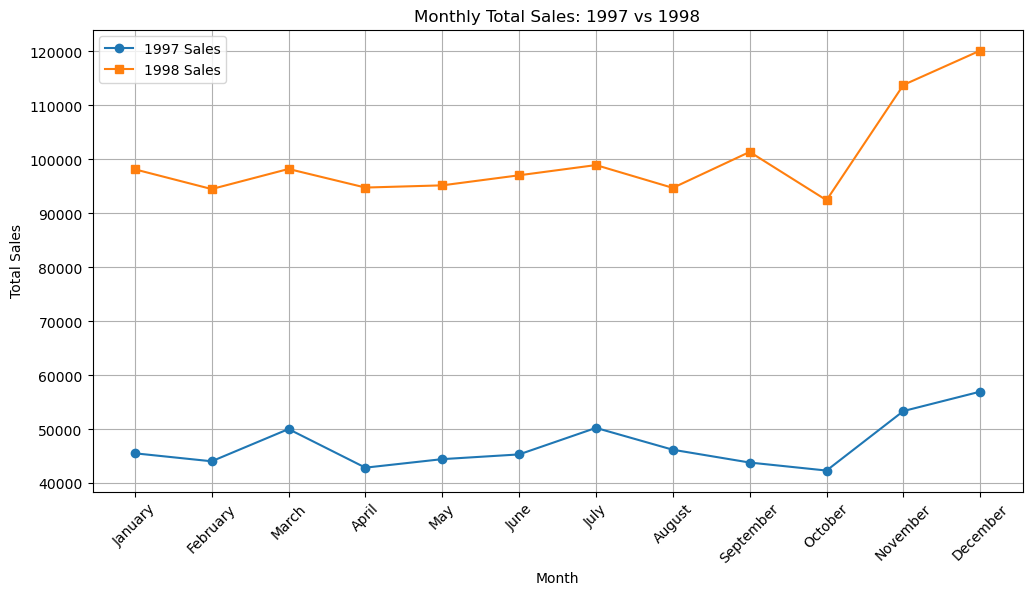

In [26]:
df_sales_97 = monthly_total_sales_97.reset_index().rename(columns = {'transaction_date' : 'month', 'sales' : '1997_sales'})
df_sales_98 = monthly_total_sales_98.reset_index().rename(columns = {'transaction_date' : 'month', 'sales' : '1998_sales'})

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 
               'September', 'October', 'November', 'December']

monthly_total_sales_97 = monthly_total_sales_97.reindex(month_order)
monthly_total_sales_98 = monthly_total_sales_98.reindex(month_order)

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_sales_97.index, monthly_total_sales_97.values, label='1997 Sales', marker='o')
plt.plot(monthly_total_sales_98.index, monthly_total_sales_98.values, label='1998 Sales', marker='s')
plt.title('Monthly Total Sales: 1997 vs 1998')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

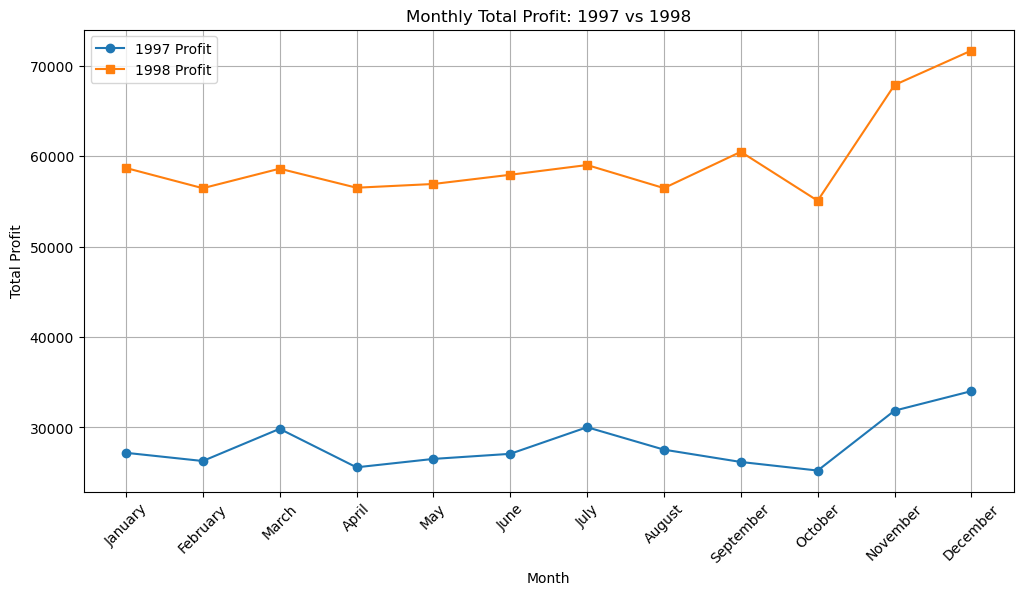

In [27]:
df_profit_97 = monthly_total_profit_97.reset_index().rename(columns = {'transaction_date' : 'month', 'profit' : '1997_profit'})
df_profit_98 = monthly_total_profit_98.reset_index().rename(columns = {'transaction_date' : 'month', 'profit' : '1998_profit'})

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 
               'September', 'October', 'November', 'December']

monthly_total_profit_97 = monthly_total_profit_97.reindex(month_order)
monthly_total_profit_98 = monthly_total_profit_98.reindex(month_order)

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_profit_97.index, monthly_total_profit_97.values, label='1997 Profit', marker='o')
plt.plot(monthly_total_profit_98.index, monthly_total_profit_98.values, label='1998 Profit', marker='s')
plt.title('Monthly Total Profit: 1997 vs 1998')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

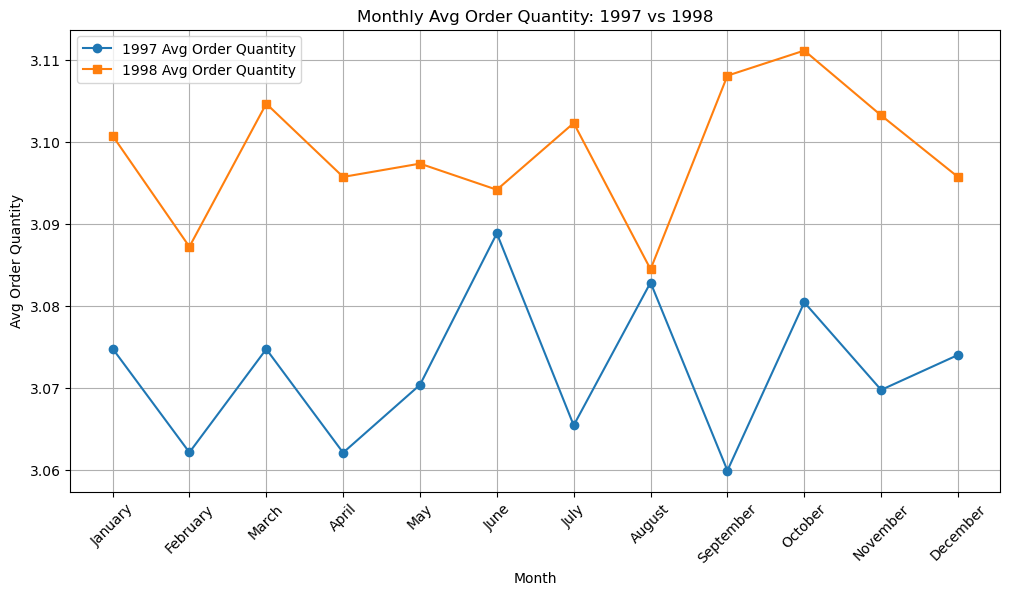

In [28]:
df_avg_order_qty_97 = monthly_avg_order_quantity_97.reset_index().rename(columns = {'transaction_date' : 'month', 'quantity' : '1997_avg_order_qty'})
df_avg_order_qty_98 = monthly_avg_order_quantity_98.reset_index().rename(columns = {'transaction_date' : 'month', 'quantity' : '1998_avg_order_qty'})

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 
               'September', 'October', 'November', 'December']

monthly_avg_order_quantity_97 = monthly_avg_order_quantity_97.reindex(month_order)
monthly_avg_order_quantity_98 = monthly_avg_order_quantity_98.reindex(month_order)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_order_quantity_97.index, monthly_avg_order_quantity_97.values, label='1997 Avg Order Quantity', marker='o')
plt.plot(monthly_avg_order_quantity_98.index, monthly_avg_order_quantity_98.values, label='1998 Avg Order Quantity', marker='s')
plt.title('Monthly Avg Order Quantity: 1997 vs 1998')
plt.xlabel('Month')
plt.ylabel('Avg Order Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [29]:
# a. ii. Region
cx_sales_overview_97 = cx_sales_overview_97.drop(columns=['sales_region'], errors='ignore')
cx_sales_overview_98 = cx_sales_overview_98.drop(columns=['sales_region'], errors='ignore')

cx_sales_overview_97 = pd.merge(cx_sales_overview_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')
cx_sales_overview_98 = pd.merge(cx_sales_overview_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

# total_sales_97_by_region = cx_sales_overview_97.groupby('sales_region').sales.sum()
# total_profit_97_by_region = cx_sales_overview_97.groupby('sales_region').profit.sum()
# avg_order_qty_97_by_region = cx_sales_overview_97.groupby('sales_region').quantity.mean()

# total_sales_98_by_region = cx_sales_overview_98.groupby('sales_region').sales.sum()
# total_profit_98_by_region = cx_sales_overview_98.groupby('sales_region').profit.sum()
# avg_order_qty_98_by_region = cx_sales_overview_98.groupby('sales_region').quantity.mean()

In [ ]:
# df_sales_97_region = total_sales_97_by_region.reset_index().rename(columns = { 'sales' : '1997_sales'})
# df_sales_98_region = total_sales_98_by_region.reset_index().rename(columns = {'sales' : '1998_sales'})

In [30]:
sales_97 = cx_sales_overview_97.groupby('sales_region').agg(total_sales_97=('sales', 'sum'),
           total_profit_97=('profit', 'sum'), avg_order_qty_97=('quantity', 'mean')).reset_index()
sales_98 = cx_sales_overview_98.groupby('sales_region').agg(total_sales_98=('sales', 'sum'),
           total_profit_98=('profit', 'sum'), avg_order_qty_98=('quantity', 'mean')).reset_index()

region_summary = pd.merge(sales_97, sales_98, on='sales_region', how='outer')
# region_summary.head()

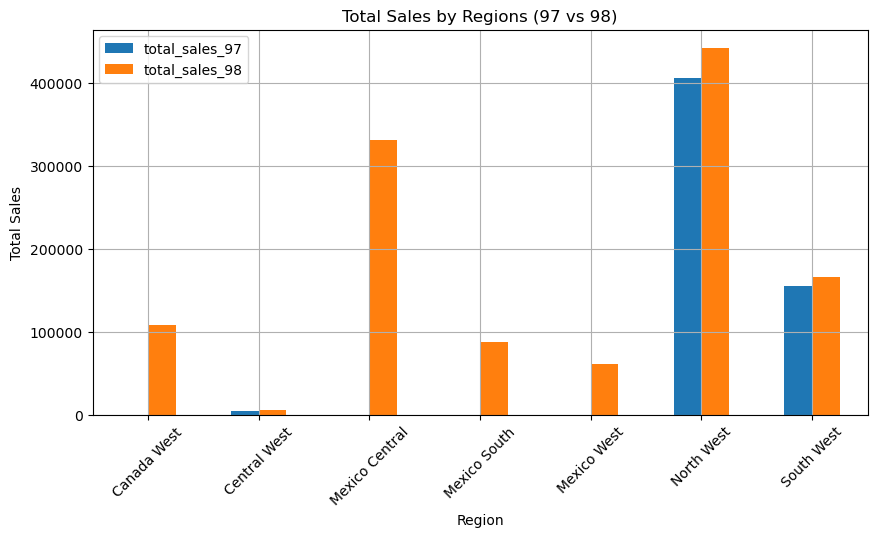

In [31]:
region_summary.set_index('sales_region', inplace=True)
region_summary[['total_sales_97', 'total_sales_98']].plot(kind='bar', figsize=(10, 5), title='Total Sales by Regions (97 vs 98)')
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid()
plt.show()

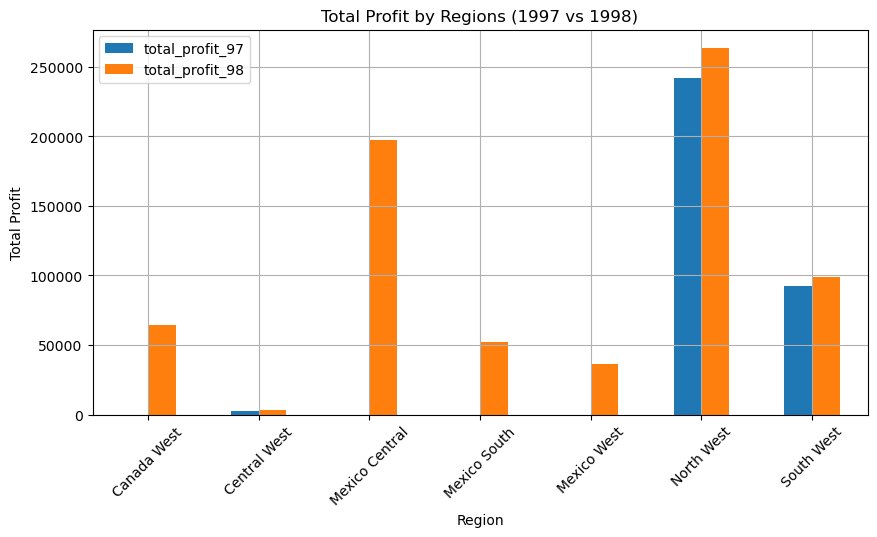

In [32]:
region_summary[['total_profit_97', 'total_profit_98']].plot(kind='bar', figsize=(10, 5), title='Total Profit by Regions (1997 vs 1998)')
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid()
plt.show()

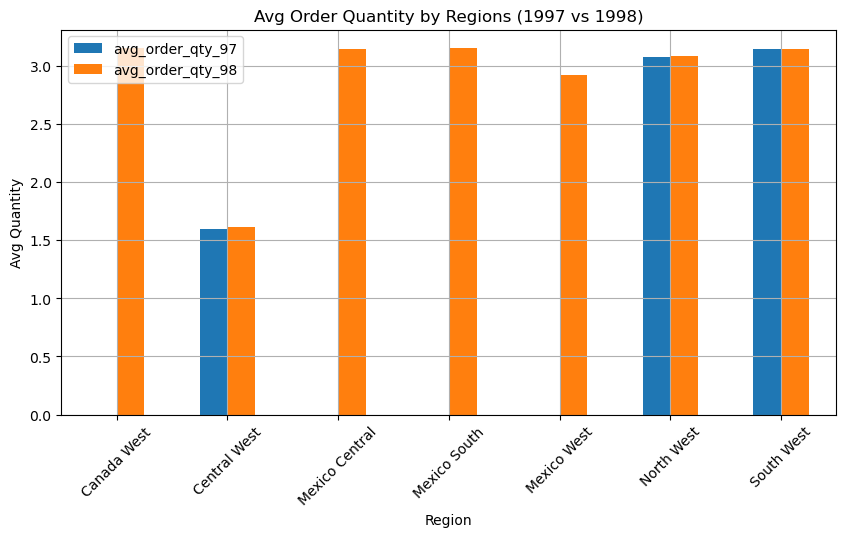

In [33]:
region_summary[['avg_order_qty_97', 'avg_order_qty_98']].plot(kind='bar', figsize=(10, 5), title='Avg Order Quantity by Regions (1997 vs 1998)')
plt.ylabel("Avg Quantity")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [34]:
# c. Store Type
# cx_sales_overview_97.head()
total_sales_97_by_store_type = cx_sales_overview_97.groupby('store_type').sales.sum()
total_profit_97_by_store_type = cx_sales_overview_97.groupby('store_type').profit.sum()
avg_order_qty_97_by_store_type = cx_sales_overview_97.groupby('store_type').quantity.sum()

total_sales_98_by_store_type = cx_sales_overview_98.groupby('store_type').sales.sum()
total_profit_98_by_store_type = cx_sales_overview_98.groupby('store_type').profit.sum()
avg_order_qty_98_by_store_type = cx_sales_overview_98.groupby('store_type').quantity.sum()

In [35]:
df_sales_97_store_type = total_sales_97_by_store_type.reset_index().rename(columns = { 'sales' : '1997_sales'})
df_sales_98_store_type = total_sales_98_by_store_type.reset_index().rename(columns = {'sales' : '1998_sales'})

df_profit_97_store_type = total_profit_97_by_store_type.reset_index().rename(columns = { 'profit' : '1997_profit'})
df_profit_98_store_type = total_profit_98_by_store_type.reset_index().rename(columns = {'profit' : '1998_profit'})

df_avg_order_qty_97_store_type = avg_order_qty_97_by_store_type.reset_index().rename(columns = { 'quantity' : 'avg_order_qty'})
df_avg_order_qty_98_store_type = avg_order_qty_98_by_store_type.reset_index().rename(columns = {'quantity' : 'avg_order_qty'})

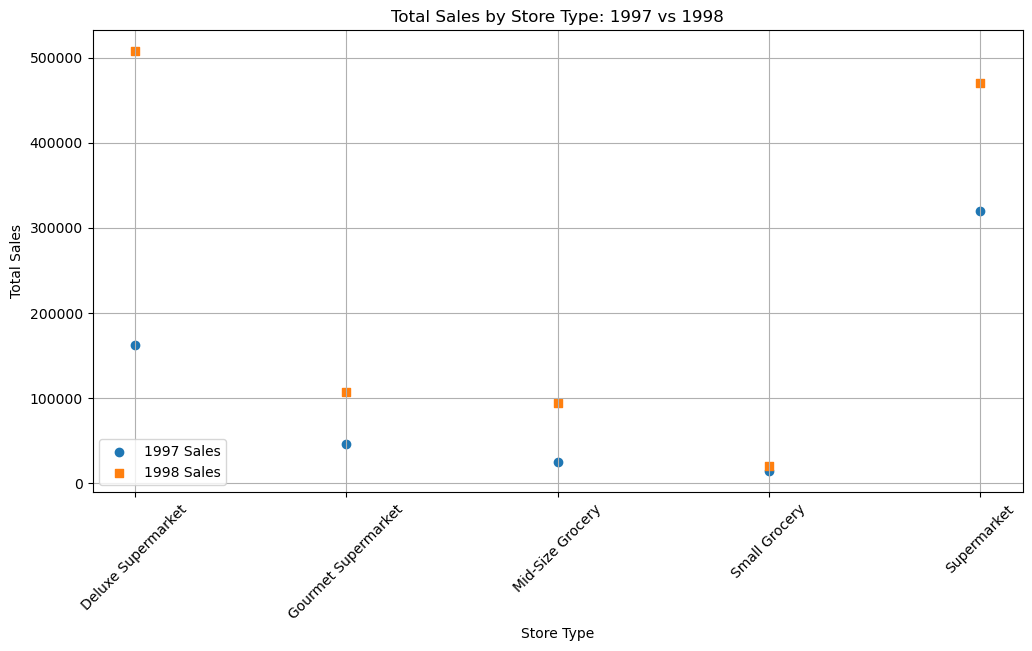

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(df_sales_97_store_type['store_type'], df_sales_97_store_type['1997_sales'], label='1997 Sales', marker='o')
plt.scatter(df_sales_98_store_type['store_type'], df_sales_98_store_type['1998_sales'], label='1998 Sales', marker='s')
plt.title('Total Sales by Store Type: 1997 vs 1998')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

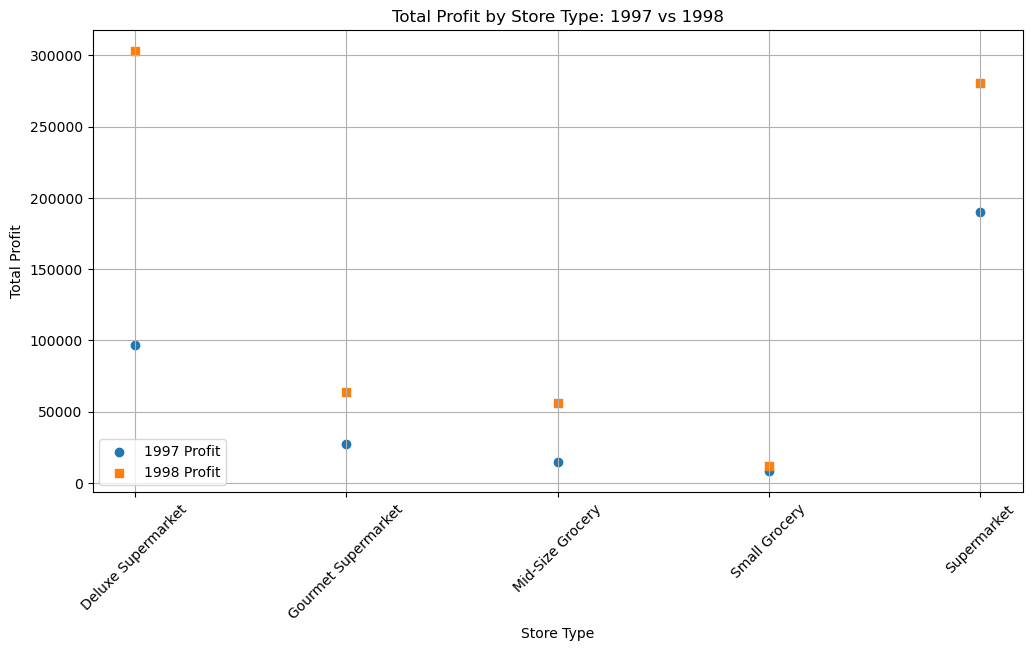

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(df_profit_97_store_type['store_type'], df_profit_97_store_type['1997_profit'], label='1997 Profit', marker='o')
plt.scatter(df_profit_98_store_type['store_type'], df_profit_98_store_type['1998_profit'], label='1998 Profit', marker='s')
plt.title('Total Profit by Store Type: 1997 vs 1998')
plt.xlabel('Store Type')
plt.ylabel('Total Profit')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

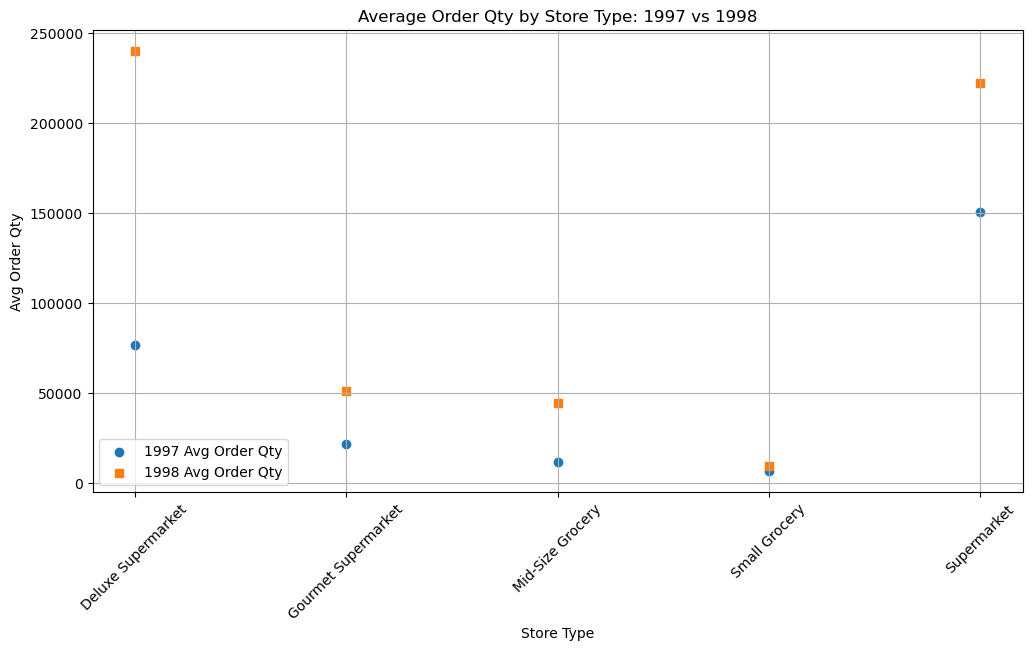

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(df_avg_order_qty_97_store_type['store_type'], df_avg_order_qty_97_store_type['avg_order_qty'], label='1997 Avg Order Qty', marker='o')
plt.scatter(df_avg_order_qty_98_store_type['store_type'], df_avg_order_qty_98_store_type['avg_order_qty'], label='1998 Avg Order Qty', marker='s')
plt.title('Average Order Qty by Store Type: 1997 vs 1998')
plt.xlabel('Store Type')
plt.ylabel('Avg Order Qty')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [39]:
# d. Product Brand
total_sales_97_by_brand = cx_sales_overview_97.groupby('product_brand').sales.sum()
total_profit_97_by_brand = cx_sales_overview_97.groupby('product_brand').profit.sum()
avg_order_qty_97_by_brand = cx_sales_overview_97.groupby('product_brand').quantity.sum()

total_sales_98_by_brand = cx_sales_overview_98.groupby('product_brand').sales.sum()
total_profit_98_by_brand = cx_sales_overview_98.groupby('product_brand').profit.sum()
avg_order_qty_98_by_brand = cx_sales_overview_98.groupby('product_brand').quantity.sum()

In [40]:
df_sales_97_brand = total_sales_97_by_brand.reset_index().rename(columns = {'product_brand' : 'brand', 'sales' : '1997_sales'}).sort_values(by = '1997_sales', ascending = False).head(5)
df_sales_98_brand = total_sales_98_by_brand.reset_index().rename(columns = {'product_brand' : 'brand', 'sales' : '1998_sales'}).sort_values(by = '1998_sales', ascending = False).head(5)

df_profit_97_brand = total_profit_97_by_brand.reset_index().rename(columns = {'product_brand' : 'brand', 'profit' : '1997_profit'}).sort_values(by = '1997_profit', ascending = False).head(5)
df_profit_98_brand = total_profit_98_by_brand.reset_index().rename(columns = {'product_brand' : 'brand', 'profit' : '1998_profit'}).sort_values(by = '1998_profit', ascending = False).head(5)

df_avg_order_qty_97_brand = avg_order_qty_97_by_brand.reset_index().rename(columns = {'product_brand' : 'brand', 'quantity' : 'avg_order_qty'}).sort_values(by = 'avg_order_qty', ascending = False).head(5)
df_avg_order_qty_98_brand = avg_order_qty_98_by_brand.reset_index().rename(columns = {'product_brand' : 'brand', 'quantity' : 'avg_order_qty'}).sort_values(by = 'avg_order_qty', ascending = False).head(5)

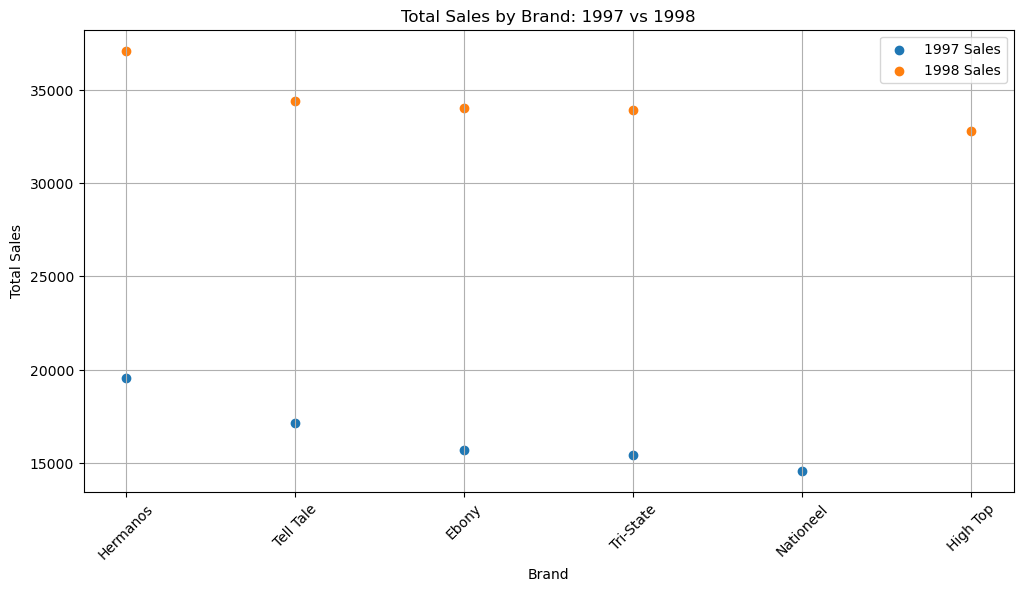

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(df_sales_97_brand['brand'], df_sales_97_brand['1997_sales'], label='1997 Sales', marker='o')
plt.scatter(df_sales_98_brand['brand'], df_sales_98_brand['1998_sales'], label='1998 Sales', marker='o')
plt.title('Total Sales by Brand: 1997 vs 1998')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

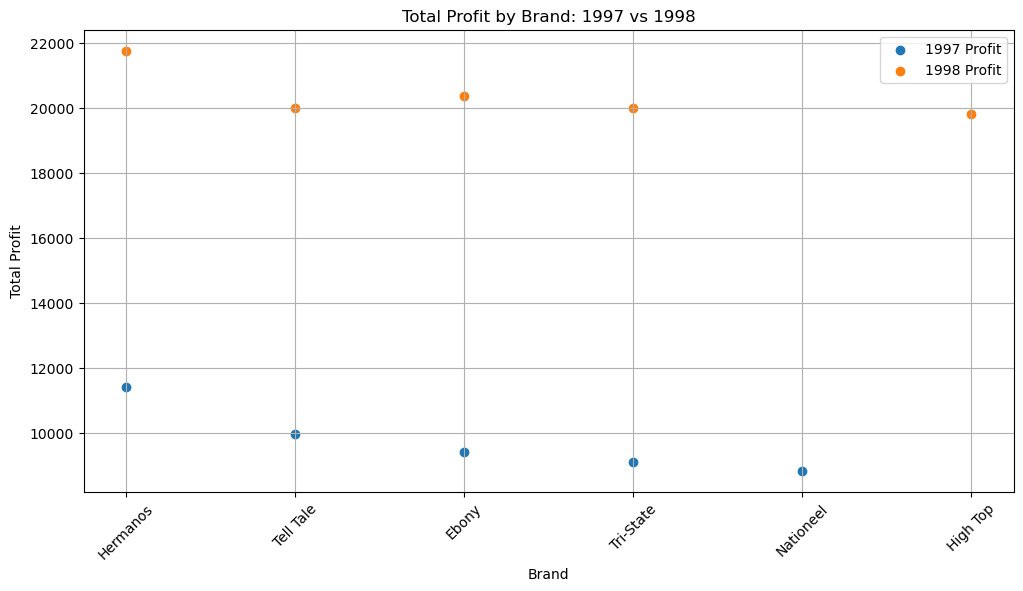

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(df_profit_97_brand['brand'], df_profit_97_brand['1997_profit'], label='1997 Profit', marker='o')
plt.scatter(df_profit_98_brand['brand'], df_profit_98_brand['1998_profit'], label='1998 Profit', marker='o')
plt.title('Total Profit by Brand: 1997 vs 1998')
plt.xlabel('Brand')
plt.ylabel('Total Profit')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

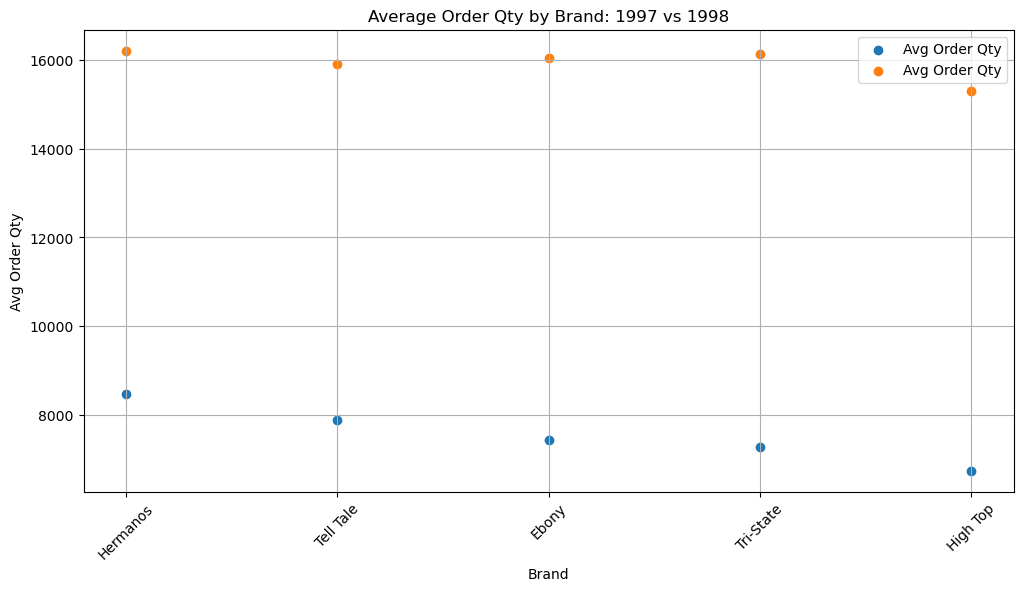

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(df_avg_order_qty_97_brand['brand'], df_avg_order_qty_97_brand['avg_order_qty'], label='Avg Order Qty', marker='o')
plt.scatter(df_avg_order_qty_98_brand['brand'], df_avg_order_qty_98_brand['avg_order_qty'], label='Avg Order Qty', marker='o')
plt.title('Average Order Qty by Brand: 1997 vs 1998')
plt.xlabel('Brand')
plt.ylabel('Avg Order Qty')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [44]:
# b.  How many unique customers purchased in each region? Which region has the highest customer engagement?
cx_reg_97 = pd.merge(customers[['customer_id']], transaction_97[['customer_id', 'store_id']], on = 'customer_id', how = 'left')
cx_reg_97 = pd.merge(cx_reg_97, stores[['store_id', 'region_id']], on = 'store_id', how = 'left')
cx_reg_97 = pd.merge(cx_reg_97, regions, on = 'region_id', how = 'left')
cx_reg_97.drop('store_id', axis = 1, inplace = True)
# cx_reg.head()

# dropna for those cx who did not purchase anything
cx_reg_97.dropna(subset=['sales_region'], inplace = True)
unique_cx_97_purchased_by_region = cx_reg_97.groupby('sales_region').customer_id.nunique().sort_values(ascending=False)
unique_cx_97_purchased_by_region

sales_region
North West      2865
South West      2420
Central West     296
Name: customer_id, dtype: int64

In [45]:
cx_reg_98 = pd.merge(customers[['customer_id']], transaction_98[['customer_id', 'store_id']], on = 'customer_id', how = 'left')
cx_reg_98 = pd.merge(cx_reg_98, stores[['store_id', 'region_id']], on = 'store_id', how = 'left')
cx_reg_98 = pd.merge(cx_reg_98, regions, on = 'region_id', how = 'left')
cx_reg_98.drop('store_id', axis = 1, inplace = True)

cx_reg_98.dropna(subset=['sales_region'], inplace = True)
unique_cx_98_purchased_by_region = cx_reg_98.groupby('sales_region').customer_id.nunique().sort_values(ascending=False)
unique_cx_98_purchased_by_region

sales_region
North West        2874
South West        2420
Canada West       1380
Mexico Central     724
Mexico West        283
Central West       281
Mexico South        98
Name: customer_id, dtype: int64

##### 2. Product Performance

In [ ]:
# a.  Which are the top 10 best-selling and lowest-selling products (by quantity and revenue)?

In [46]:
data_97 = pd.merge(transaction_97[['product_id', 'quantity']], products[['product_id', 'product_name', 'product_retail_price', 'product_cost', 'low_fat']], on = 'product_id', how = 'inner')
data_98 = pd.merge(transaction_98[['product_id', 'quantity']], products[['product_id', 'product_name', 'product_retail_price', 'product_cost', 'low_fat']], on = 'product_id', how = 'inner')

data_97['revenue'] = data_97['quantity'] * data_97['product_retail_price']
data_98['revenue'] = data_98['quantity'] * data_98['product_retail_price']

In [47]:
top_selling_products_97_by_qty = data_97.groupby('product_name').quantity.sum().sort_values(ascending = False).head(10)
top_selling_products_98_by_qty = data_98.groupby('product_name').quantity.sum().sort_values(ascending = False).head(10)

least_selling_products_97_by_qty = data_97.groupby('product_name').quantity.sum().sort_values().head(10)
least_selling_products_98_by_qty = data_98.groupby('product_name').quantity.sum().sort_values().head(10)

In [48]:
top_selling_products_97_by_revenue = data_97.groupby('product_name').revenue.sum().sort_values(ascending = False).head(10)
top_selling_products_98_by_revenue = data_98.groupby('product_name').revenue.sum().sort_values(ascending = False).head(10)

least_selling_products_97_by_revenue = data_97.groupby('product_name').revenue.sum().sort_values().head(10)
least_selling_products_98_by_revenue = data_98.groupby('product_name').revenue.sum().sort_values().head(10)

In [49]:
df_top_qty_97 = top_selling_products_97_by_qty.reset_index().rename(columns = {'product_name' : 'product_name', 'quantity' : 'top_qty_97'})
df_top_qty_98 = top_selling_products_98_by_qty.reset_index().rename(columns = {'product_name' : 'product_name', 'quantity' : 'top_qty_98'})
df_least_qty_97 = least_selling_products_97_by_qty.reset_index().rename(columns = {'product_name' : 'product_name', 'quantity' : 'least_qty_97'})
df_least_qty_98 = least_selling_products_98_by_qty.reset_index().rename(columns = {'product_name' : 'product_name', 'quantity' : 'least_qty_98'})

df_top_revenue_97 = top_selling_products_97_by_revenue.reset_index().rename(columns = {'product_name' : 'product_name', 'revenue' : 'top_rev_97'})
df_top_revenue_98 = top_selling_products_98_by_revenue.reset_index().rename(columns = {'product_name' : 'product_name', 'revenue' : 'top_rev_98'})
df_least_revenue_97 = least_selling_products_97_by_revenue.reset_index().rename(columns = {'product_name' : 'product_name', 'revenue' : 'least_rev_97'})
df_least_revenue_98 = least_selling_products_98_by_revenue.reset_index().rename(columns = {'product_name' : 'product_name', 'revenue' : 'least_rev_98'})

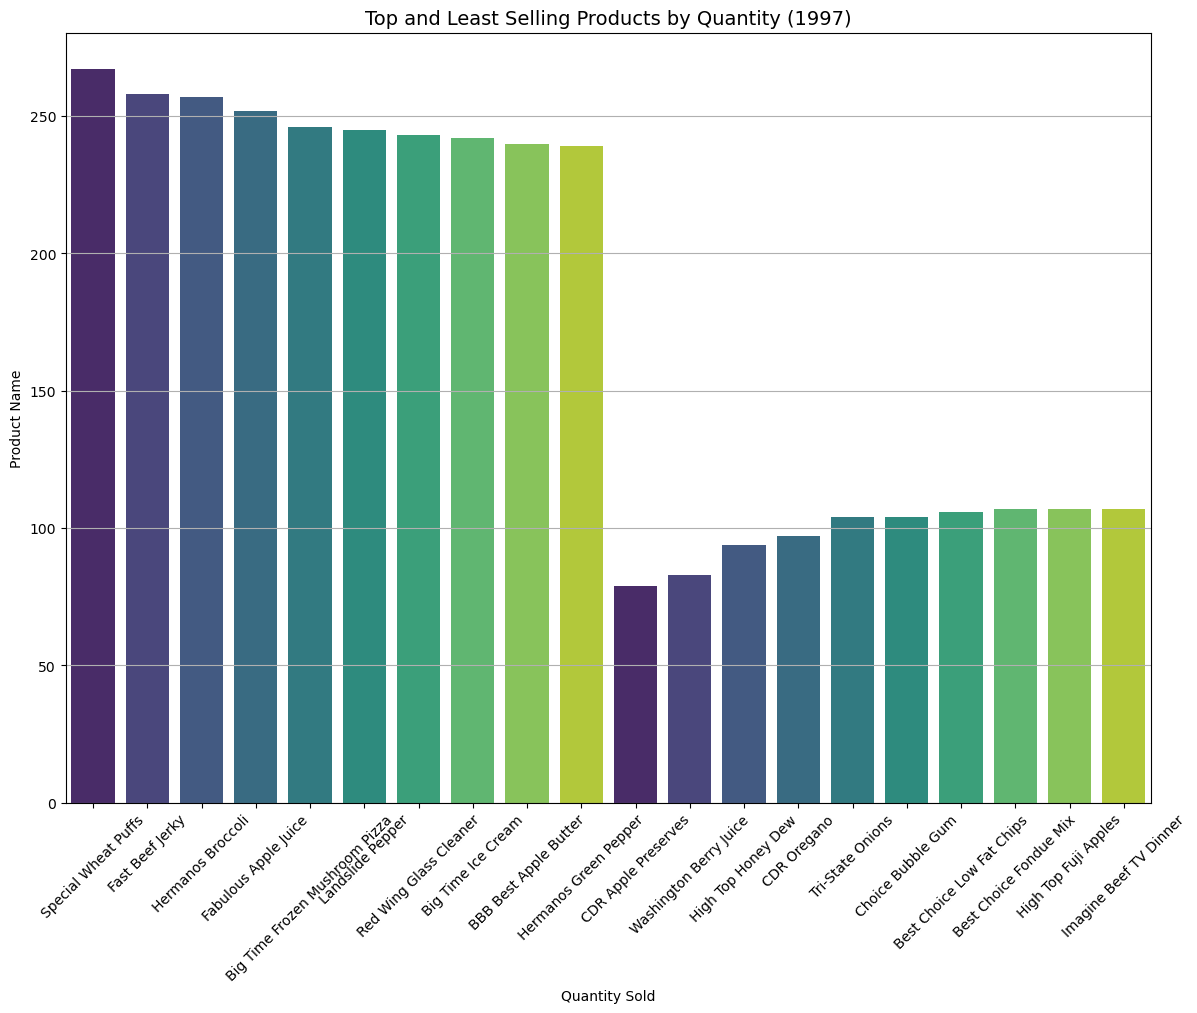

In [50]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df_top_qty_97, x='product_name', y='top_qty_97', hue = 'product_name', palette = 'viridis')
sns.barplot(data=df_least_qty_97, x='product_name', y='least_qty_97', hue = 'product_name', palette = 'viridis')
plt.title('Top and Least Selling Products by Quantity (1997)', fontsize=14)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

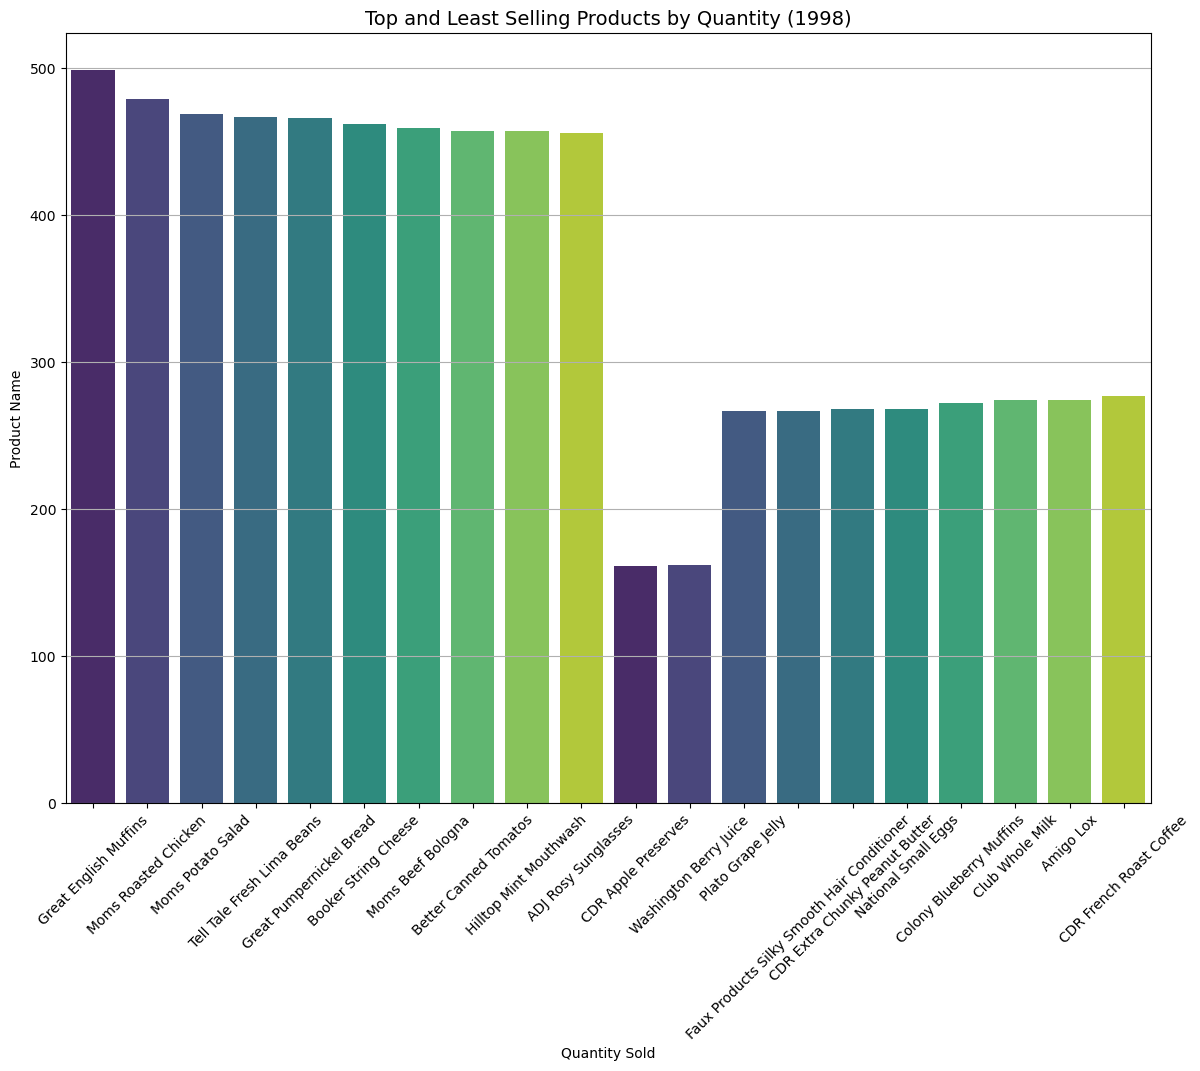

In [51]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df_top_qty_98, x='product_name', y='top_qty_98', hue = 'product_name', palette = 'viridis')
sns.barplot(data=df_least_qty_98, x='product_name', y='least_qty_98', hue = 'product_name', palette = 'viridis')
plt.title('Top and Least Selling Products by Quantity (1998)', fontsize=14)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

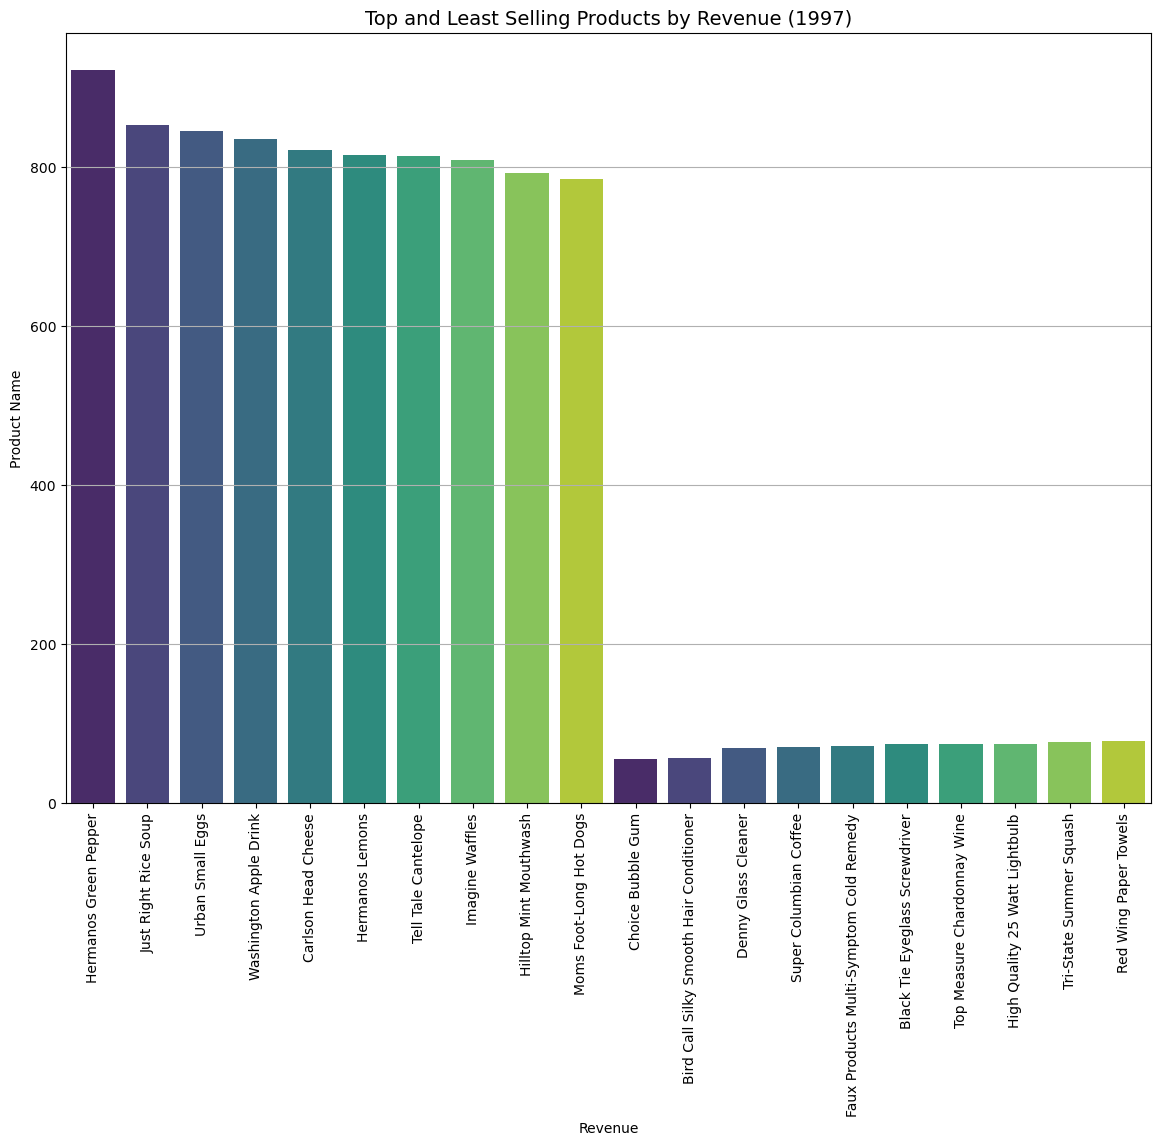

In [52]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df_top_revenue_97, x='product_name', y='top_rev_97', hue = 'product_name', palette = 'viridis')
sns.barplot(data=df_least_revenue_97, x='product_name', y='least_rev_97', hue = 'product_name', palette = 'viridis')
plt.title('Top and Least Selling Products by Revenue (1997)', fontsize=14)
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

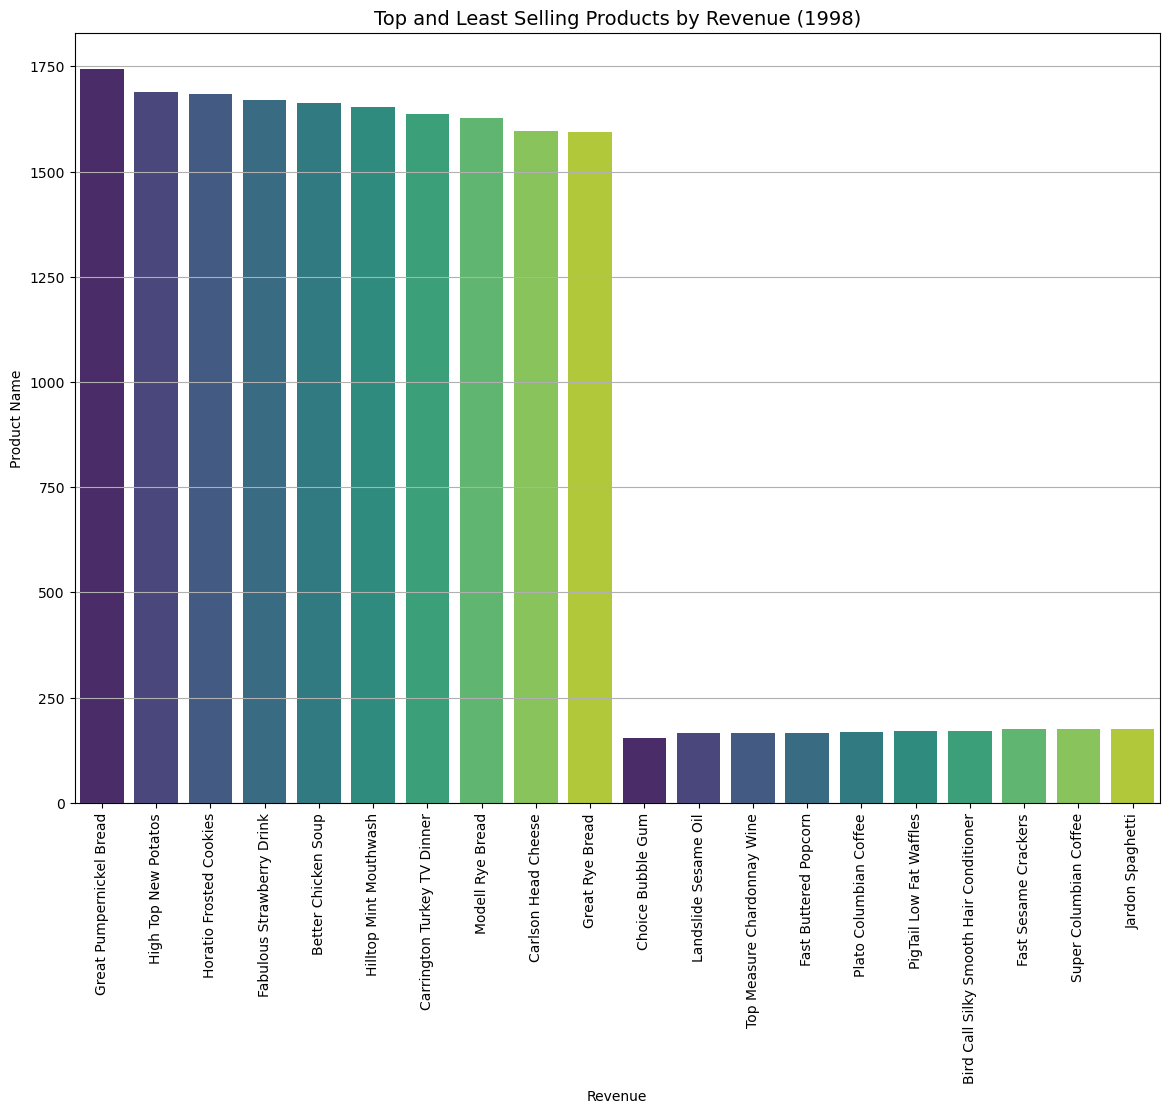

In [53]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df_top_revenue_98, x='product_name', y='top_rev_98', hue = 'product_name', palette = 'viridis')
sns.barplot(data=df_least_revenue_98, x='product_name', y='least_rev_98', hue = 'product_name', palette = 'viridis')
plt.title('Top and Least Selling Products by Revenue (1998)', fontsize=14)
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

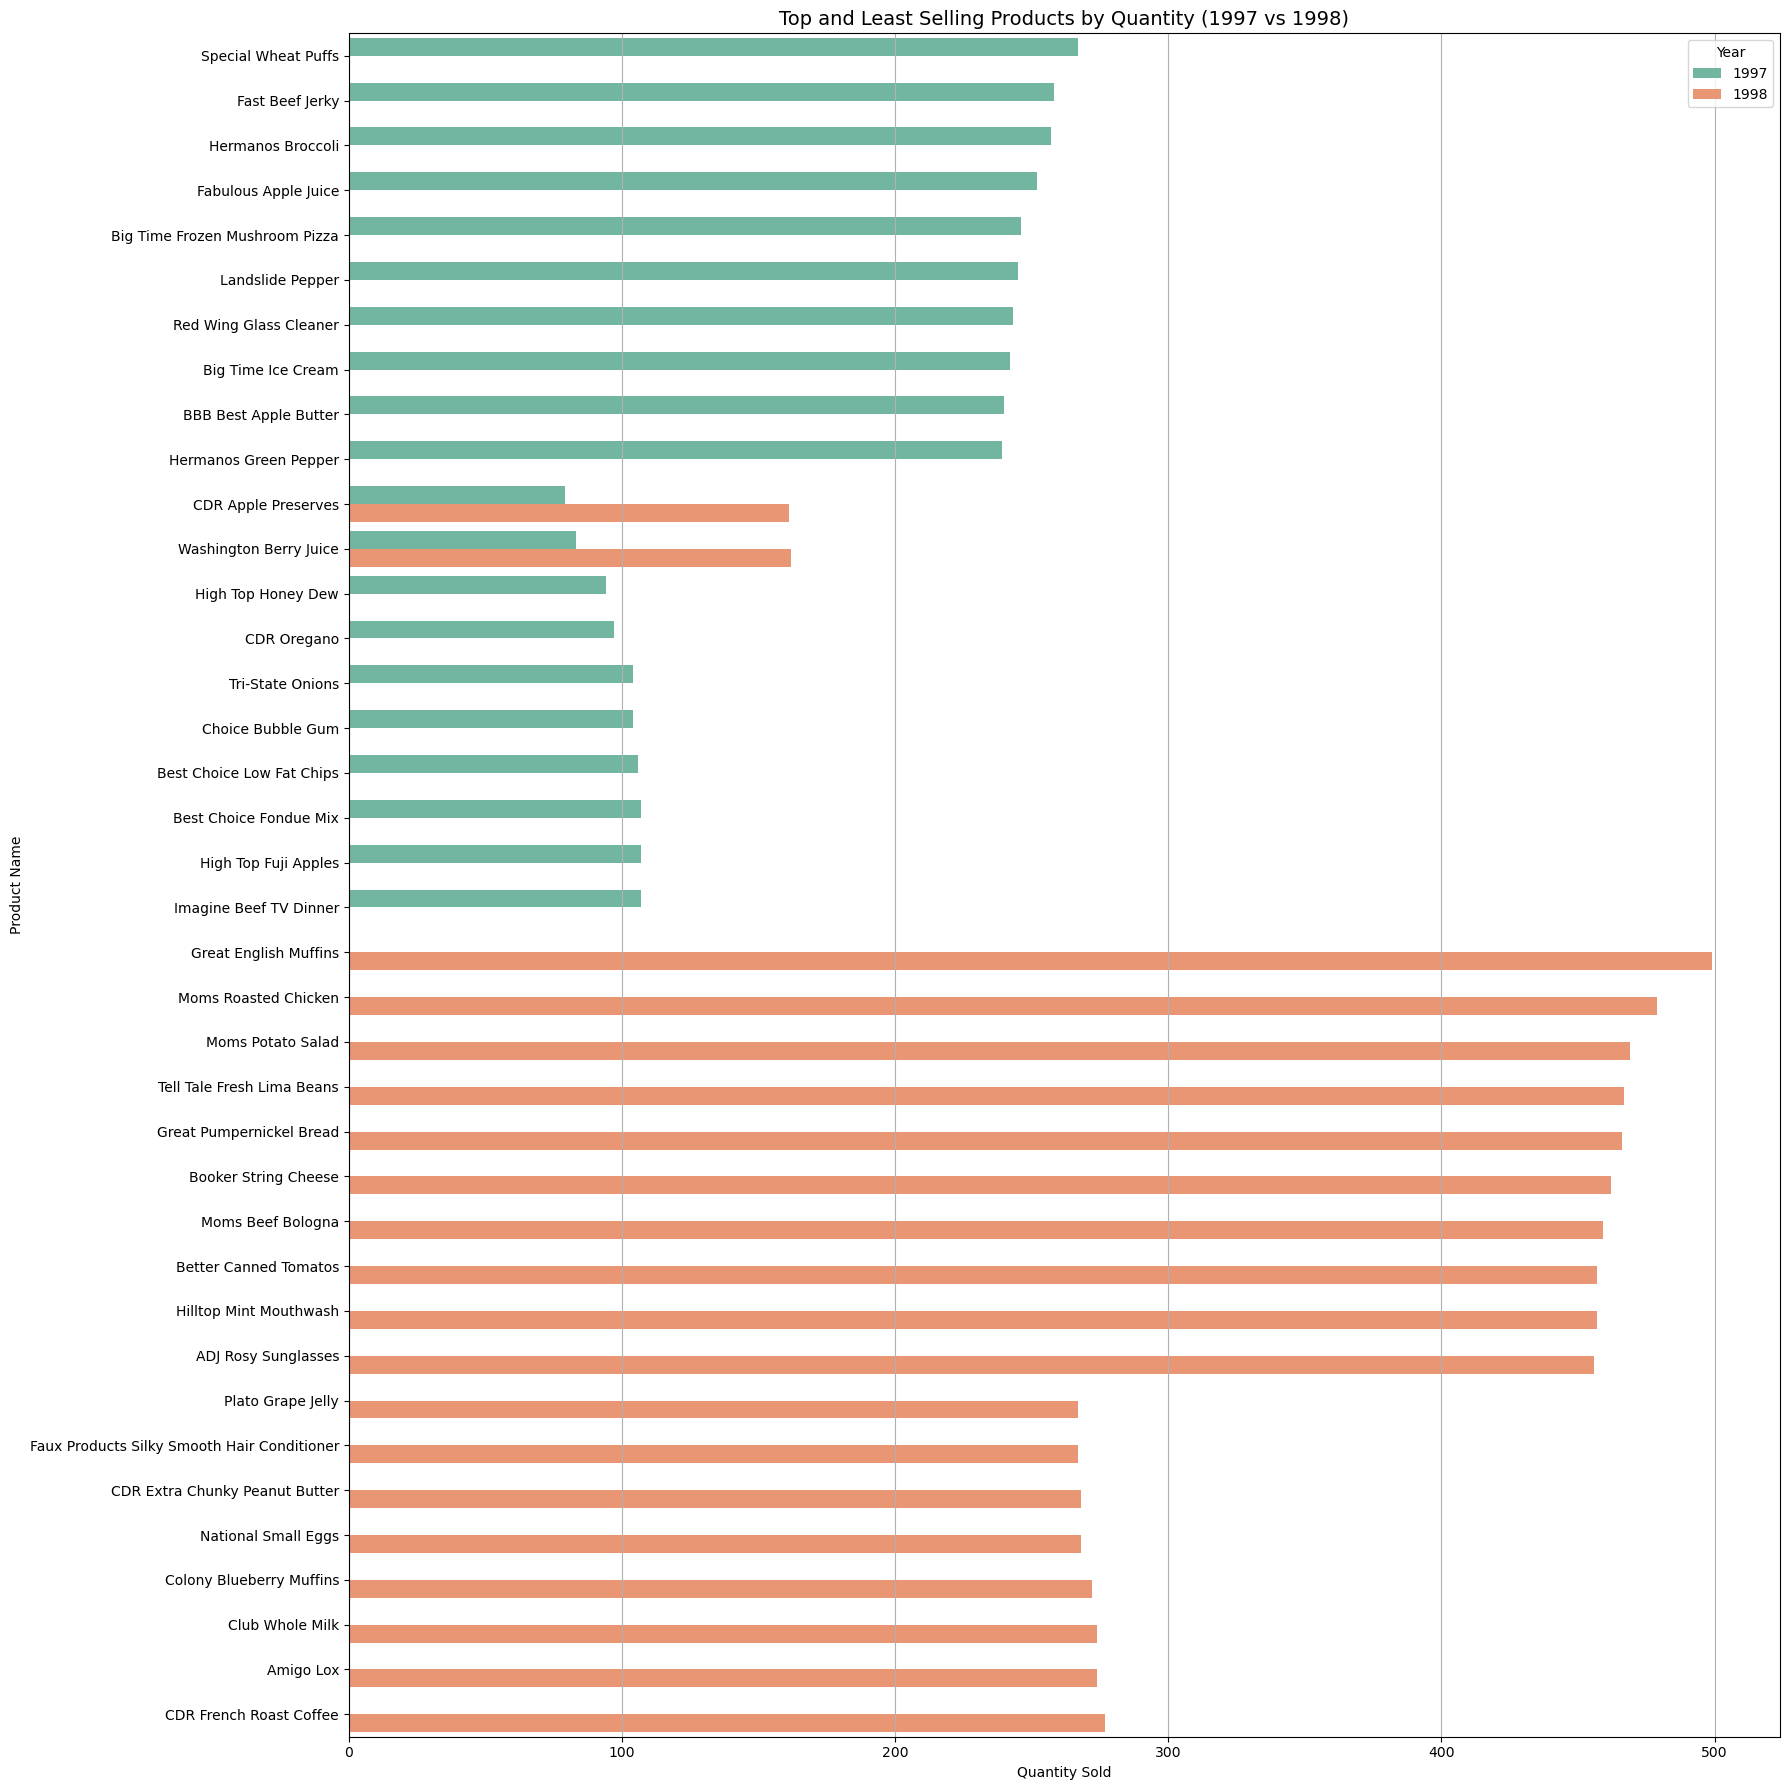

In [55]:
df_combined_qty = pd.concat([
    df_top_qty_97.assign(type='Top', year='1997').rename(columns={'top_qty_97': 'quantity'}),
    df_least_qty_97.assign(type='Least', year='1997').rename(columns={'least_qty_97': 'quantity'}),
    df_top_qty_98.assign(type='Top', year='1998').rename(columns={'top_qty_98': 'quantity'}),
    df_least_qty_98.assign(type='Least', year='1998').rename(columns={'least_qty_98': 'quantity'})
])

plt.figure(figsize=(18, 18))
sns.barplot(data=df_combined_qty, x='quantity', y='product_name', hue='year', palette='Set2')
plt.title('Top and Least Selling Products by Quantity (1997 vs 1998)', fontsize=14)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.legend(title='Year')
plt.grid(axis='x')
plt.tight_layout()

plt.show()


In [56]:
# b.  Which products have the highest profit margin?
data_97['net_profit'] = data_97['revenue'] - (data_97['quantity'] * data_97['product_cost'])

product_profit_97 = data_97.groupby('product_name').agg({'revenue' : 'sum', 'net_profit' : 'sum'})
product_profit_97['profit_margin_(%)'] = (product_profit_97['net_profit'] / product_profit_97['revenue']) * 100
product_profit_97.sort_values('profit_margin_(%)', ascending=False, inplace=True)

In [57]:
product_profit_97.head(1)

,revenue,net_profit,profit_margin_(%)
product_name,,,
Landslide Sesame Oil,106.72,75.44,70.689655


In [58]:
# b.  Which products have the highest profit margin?
data_98['net_profit'] = data_98['revenue'] - (data_98['quantity'] * data_98['product_cost'])

product_profit_98 = data_98.groupby('product_name').agg({'revenue' : 'sum', 'net_profit' : 'sum'})
product_profit_98['profit_margin_(%)'] = (product_profit_98['net_profit'] / product_profit_98['revenue']) * 100
product_profit_98.sort_values('profit_margin_(%)', ascending=False, inplace=True)

In [59]:
product_profit_98.head(1)

,revenue,net_profit,profit_margin_(%)
product_name,,,
Landslide Sesame Oil,164.72,116.44,70.689655


In [ ]:
# c.  Compare sales of low-fat vs non-low-fat products.

In [60]:
comp_sales_97 = data_97.groupby('low_fat').revenue.sum()
comp_sales_97

low_fat
No     363758.88
Yes    201479.25
Name: revenue, dtype: float64

In [61]:
comp_sales_98 = data_98.groupby('low_fat').revenue.sum()
comp_sales_98

low_fat
No     778555.34
Yes    420752.97
Name: revenue, dtype: float64

##### 3. Store-Level Insights

In [ ]:
# a. What is the average revenue per store, and how does it vary by:
#      i. Store type,      ii. Region and      iii. Remodeling status (before/after last_remodel_date)

In [62]:
df_97 = pd.merge(transaction_97[['product_id','store_id', 'transaction_date', 'quantity']], products[['product_id', 'product_retail_price']], on = 'product_id', how = 'left')
df_97 = pd.merge(df_97, stores[['store_id','region_id', 'store_type', 'last_remodel_date']], on = 'store_id', how = 'left')
df_97 = pd.merge(df_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

df_98 = pd.merge(transaction_98[['product_id','store_id', 'transaction_date', 'quantity']], products[['product_id', 'product_retail_price']], on = 'product_id', how = 'left')
df_98 = pd.merge(df_98, stores[['store_id','region_id', 'store_type', 'last_remodel_date']], on = 'store_id', how = 'left')
df_98 = pd.merge(df_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

In [63]:
# a.  i. Store Type
df_97['revenue'] = df_97['quantity'] * df_97['product_retail_price']
a_97 = df_97.groupby(['store_id', 'store_type']).revenue.sum().reset_index()
avg_rev_store_type_97 = a_97.groupby('store_type').revenue.mean().sort_values()

avg_rev_97 = avg_rev_store_type_97.reset_index().rename(columns = {'revenue' : 'Avg_Rev'})

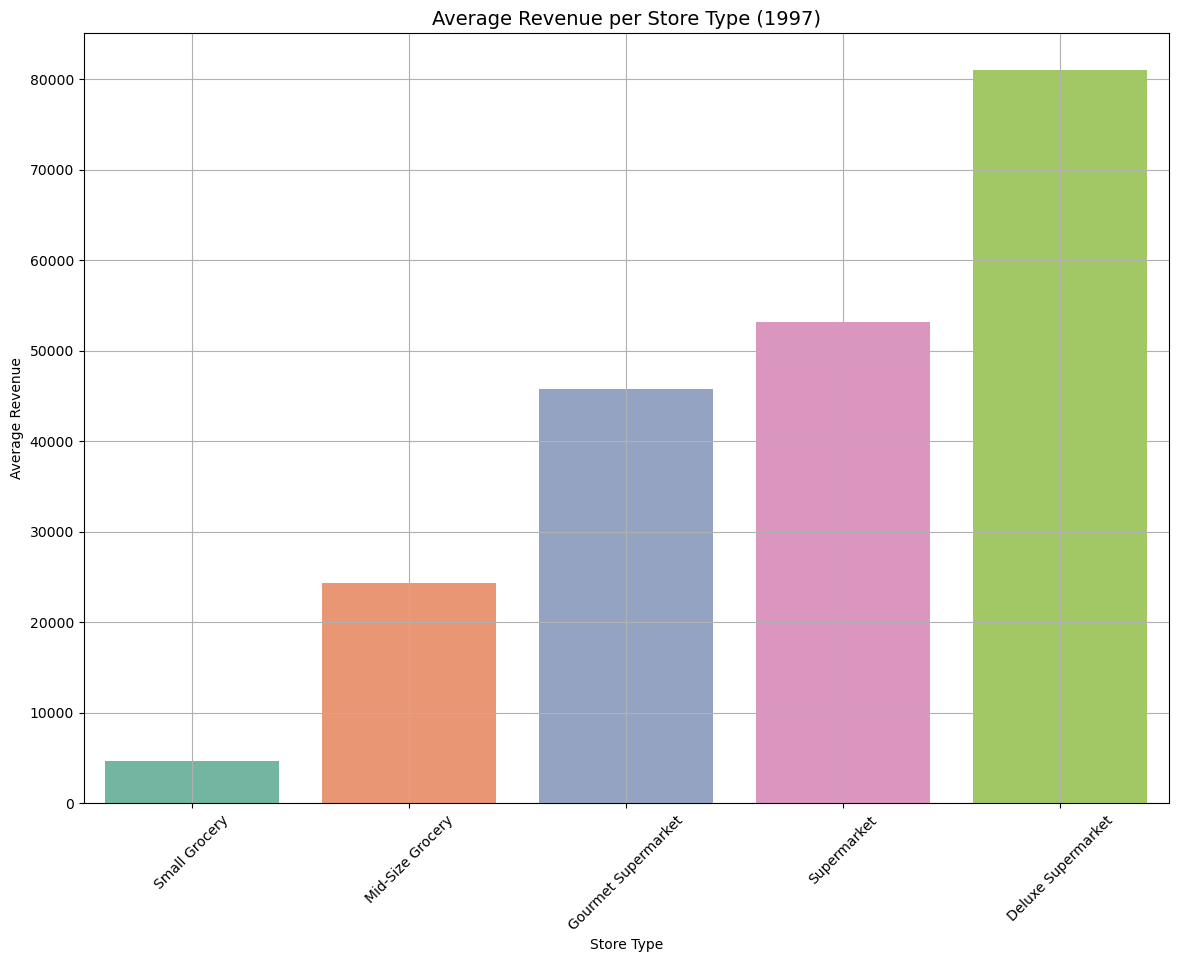

In [64]:
plt.figure(figsize=(14, 10))
sns.barplot(data = avg_rev_97, x='store_type', y='Avg_Rev', hue = 'store_type', palette = 'Set2')
plt.title('Average Revenue per Store Type (1997)', fontsize=14)
plt.xlabel('Store Type')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [65]:
df_98['revenue'] = df_98['quantity'] * df_98['product_retail_price']
a_98 = df_98.groupby(['store_id', 'store_type']).revenue.sum().reset_index()
avg_rev_per_store_type_98 = a_98.groupby('store_type').revenue.mean().sort_values()

avg_rev_98 = avg_rev_per_store_type_98.reset_index().rename(columns = {'revenue' : 'Avg_Rev'})

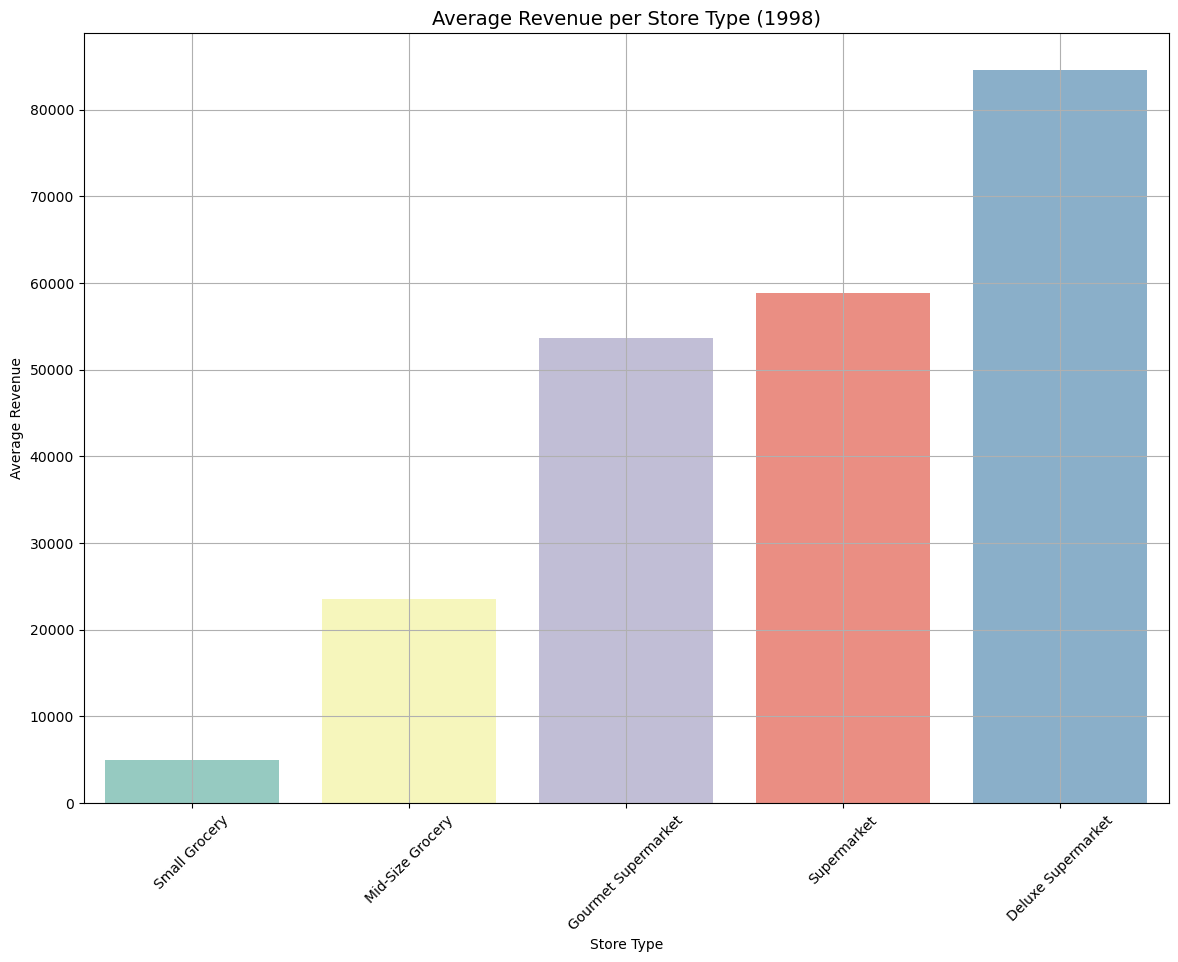

In [66]:
plt.figure(figsize=(14, 10))
sns.barplot(data = avg_rev_98, x='store_type', y='Avg_Rev', hue = 'store_type', palette = 'Set3')
plt.title('Average Revenue per Store Type (1998)', fontsize=14)
plt.xlabel('Store Type')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [67]:
# a.  ii. Region
region_97 = df_97.groupby(['region_id', 'sales_region']).revenue.sum().reset_index()
avg_rev_by_region_97 = region_97.groupby('sales_region').revenue.mean().sort_values()

avg_rev_region_97 = avg_rev_by_region_97.reset_index().rename(columns = {'revenue' : 'Avg_Rev'})

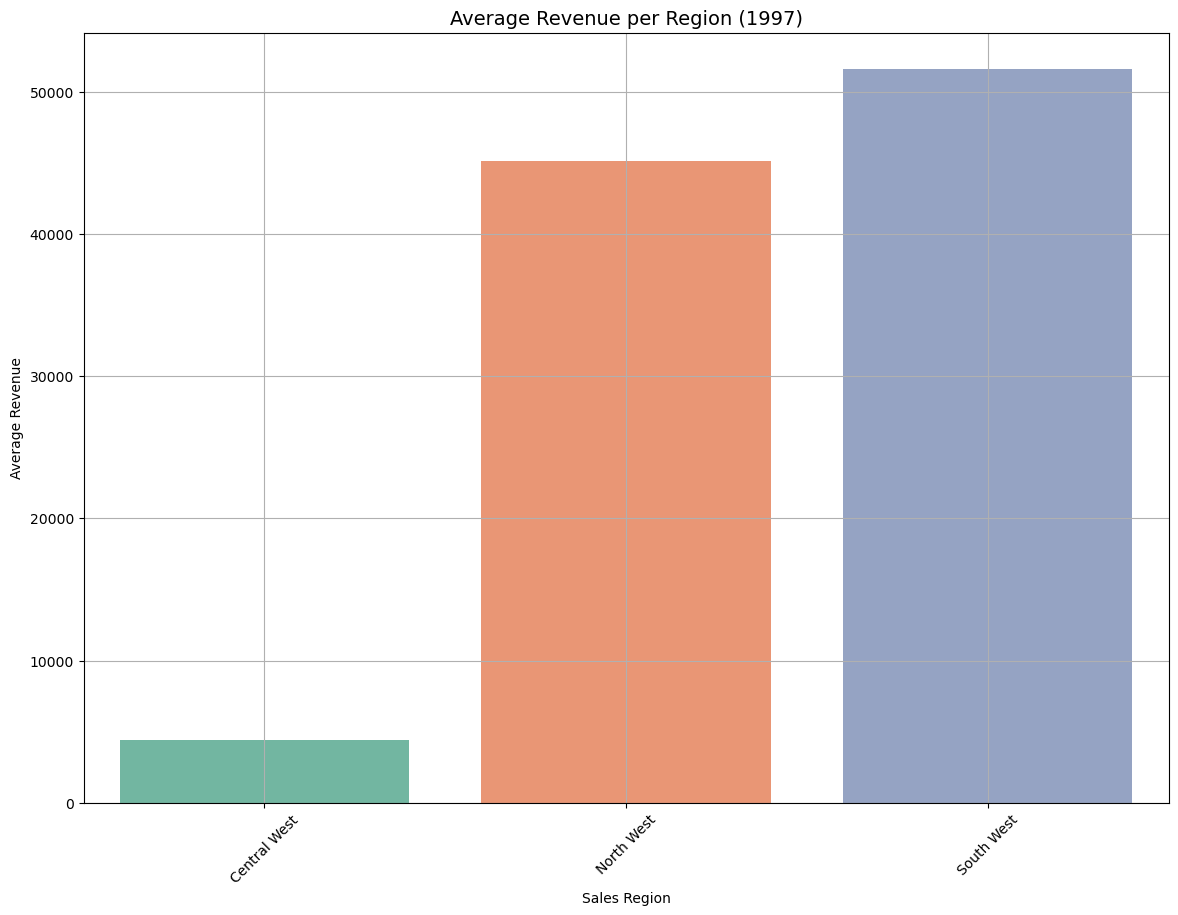

In [68]:
plt.figure(figsize=(14, 10))
sns.barplot(data = avg_rev_region_97, x='sales_region', y='Avg_Rev', hue = 'sales_region', palette = 'Set2')
plt.title('Average Revenue per Region (1997)', fontsize=14)
plt.xlabel('Sales Region')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [69]:
region_98 = df_98.groupby(['region_id', 'sales_region']).revenue.sum().reset_index()
avg_rev_by_region_98 = region_98.groupby('sales_region').revenue.mean().sort_values()

avg_rev_region_98 = avg_rev_by_region_98.reset_index().rename(columns = {'revenue' : 'Avg_Rev'})

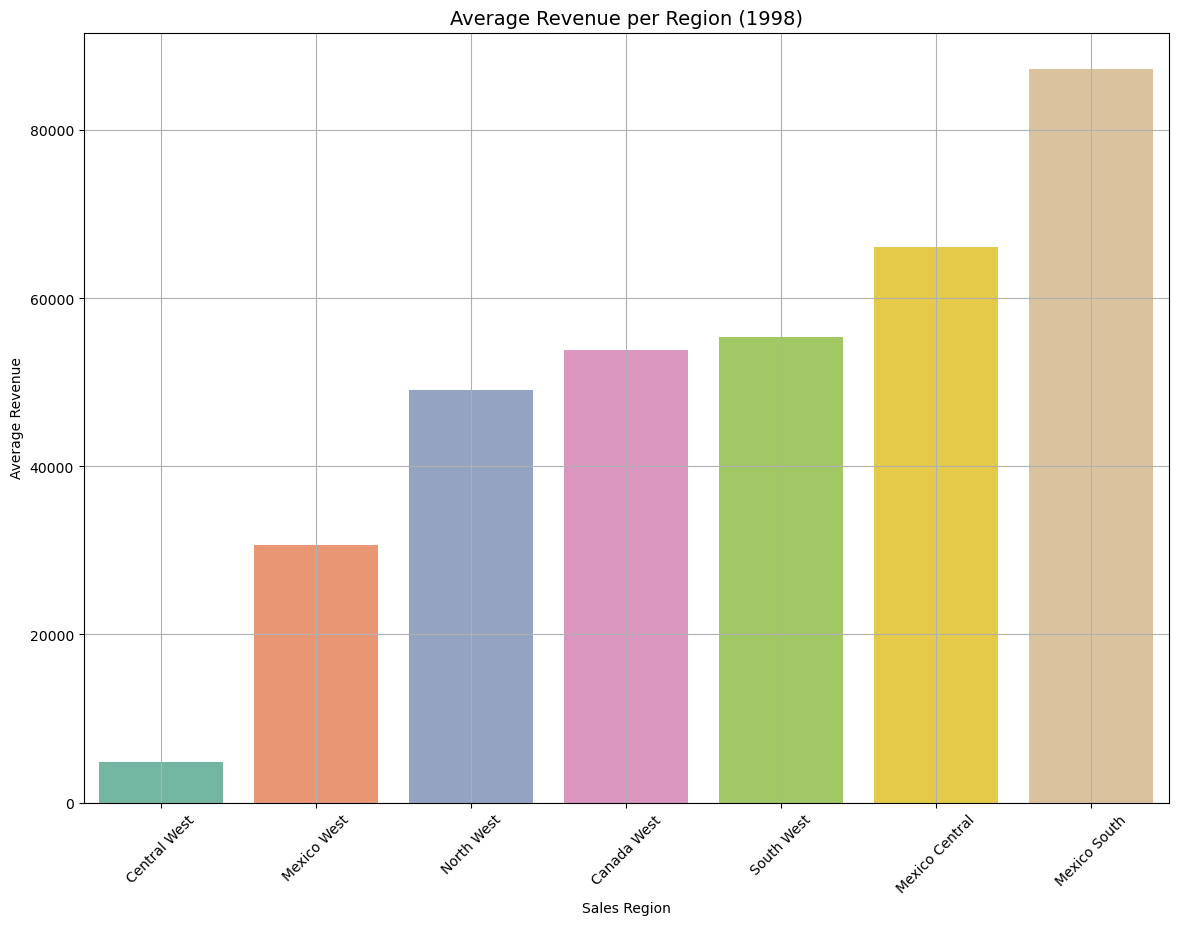

In [70]:
plt.figure(figsize=(14, 10))
sns.barplot(data = avg_rev_region_98, x='sales_region', y='Avg_Rev', hue = 'sales_region', palette = 'Set2')
plt.title('Average Revenue per Region (1998)', fontsize=14)
plt.xlabel('Sales Region')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [ ]:
# a.  iii. Remodeling status (before/after last_remodel_date)

In [71]:
df_97['remodel_status'] = df_97.apply(lambda x: 'Before Remodel' 
                                      if x['transaction_date'] < x['last_remodel_date'] 
                                      else 'After Remodel', axis = 1)

df_98['remodel_status'] = df_98.apply(lambda x: 'Before Remodel' 
                                      if x['transaction_date'] < x['last_remodel_date'] 
                                      else 'After Remodel', axis = 1)

In [72]:
store_revenue_remodel_97 = df_97.groupby(['store_id', 'remodel_status']).revenue.sum().reset_index()
avg_revenue_by_remodel_97 = store_revenue_remodel_97.groupby('remodel_status').revenue.mean().reset_index()
avg_revenue_by_remodel_97.rename(columns={'revenue': 'avg_revenue_per_store'}, inplace=True)

store_revenue_remodel_98 = df_98.groupby(['store_id', 'remodel_status']).revenue.sum().reset_index()
avg_revenue_by_remodel_98 = store_revenue_remodel_98.groupby('remodel_status').revenue.mean().reset_index()
avg_revenue_by_remodel_98.rename(columns={'revenue': 'avg_revenue_per_store'}, inplace=True)

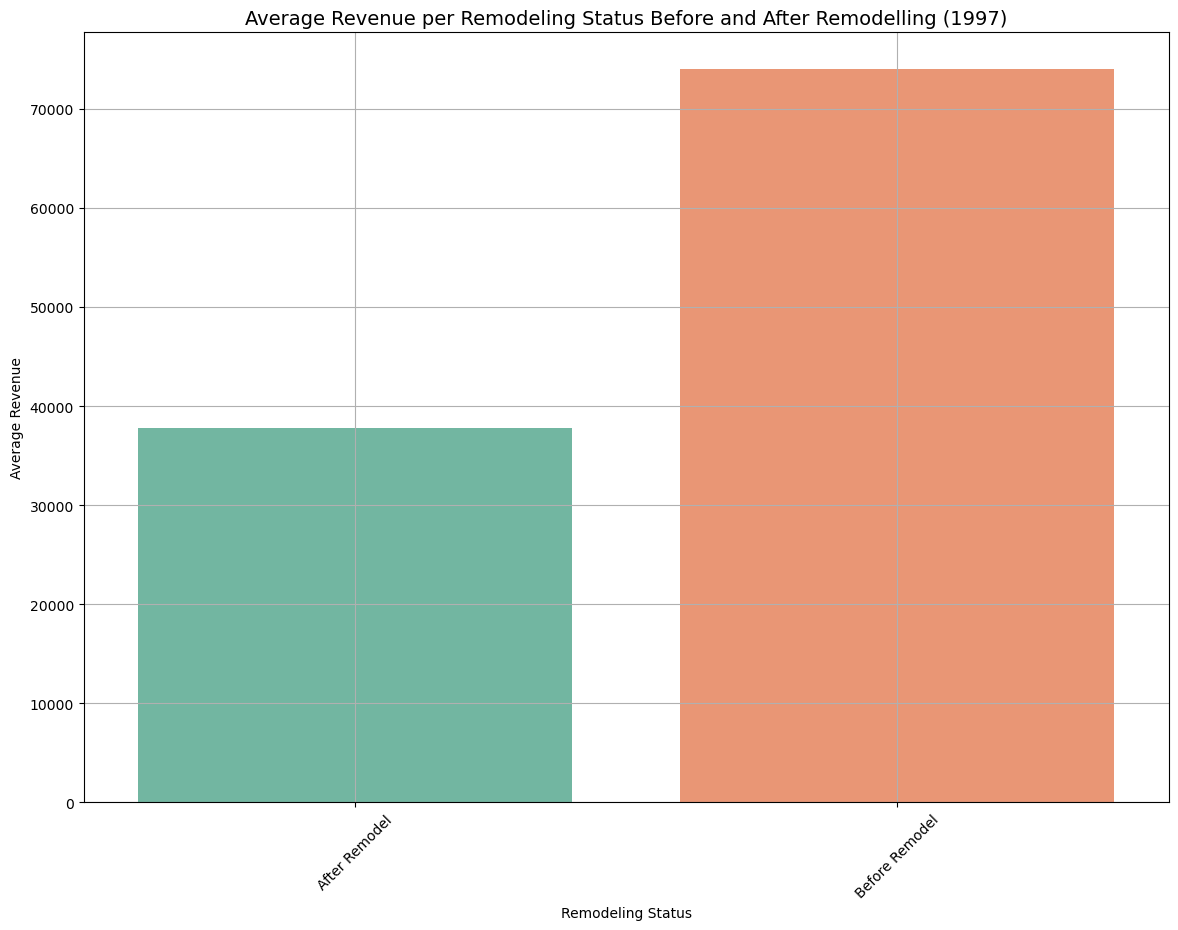

In [73]:
plt.figure(figsize=(14, 10))
sns.barplot(data = avg_revenue_by_remodel_97, x='remodel_status', y='avg_revenue_per_store', hue = 'remodel_status', palette = 'Set2')
plt.title('Average Revenue per Remodeling Status Before and After Remodelling (1997)', fontsize=14)
plt.xlabel('Remodeling Status')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

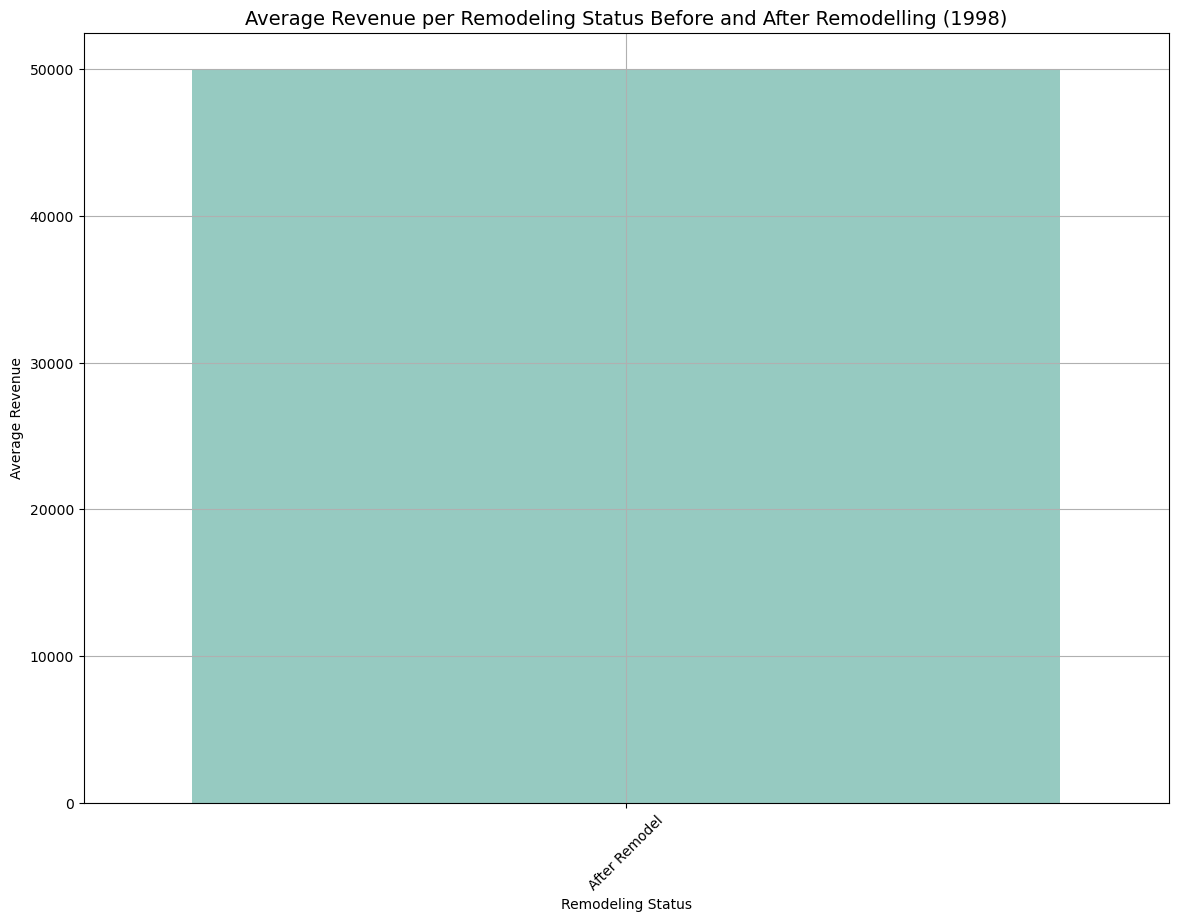

In [74]:
plt.figure(figsize=(14, 10))
sns.barplot(data = avg_revenue_by_remodel_98, x='remodel_status', y='avg_revenue_per_store', hue = 'remodel_status', palette = 'Set3')
plt.title('Average Revenue per Remodeling Status Before and After Remodelling (1998)', fontsize=14)
plt.xlabel('Remodeling Status')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

### II. Diagnostic Analysis

##### 1. Customer Behavior

In [75]:
# a.  Is there any relationship between customer demographics (gender, income, marital status) and product preference?
cx_behavior_97 = pd.merge(customers[['customer_id', 'gender', 'yearly_income', 'marital_status', 'homeowner']], transaction_97[['customer_id', 'product_id', 'quantity']], on = 'customer_id', how = 'right')
cx_behavior_97 = pd.merge(cx_behavior_97, products[['product_id', 'product_name', 'product_retail_price']], on = 'product_id', how = 'left')

cx_behavior_98 = pd.merge(customers[['customer_id', 'gender', 'yearly_income', 'marital_status']], transaction_98[['customer_id', 'product_id', 'quantity']], on = 'customer_id', how = 'right')
cx_behavior_98 = pd.merge(cx_behavior_98, products[['product_id', 'product_name', 'product_retail_price']], on = 'product_id', how = 'left')

In [76]:
# way: 1
# cx_behavior_97.groupby(['gender', 'product_name']).size().reset_index(name = 'purchase_count')\
# .sort_values(['gender', 'purchase_count'], ascending=[True, False])

# way: 2
# pd.crosstab(cx_behavior_97['product_name'], cx_behavior_97['gender'], 
#             rownames = ['Product Name'], colnames = ['Gender'])

# way: 3
gender_counts_97 = cx_behavior_97.groupby('gender').product_name.count()
product_by_gender_97 = cx_behavior_97.groupby(['gender', 'product_name']).size().reset_index(name='count')
product_by_gender_97['percentage'] = product_by_gender_97.apply(
    lambda x: (x['count'] / gender_counts_97[x['gender']]) * 100, axis=1)

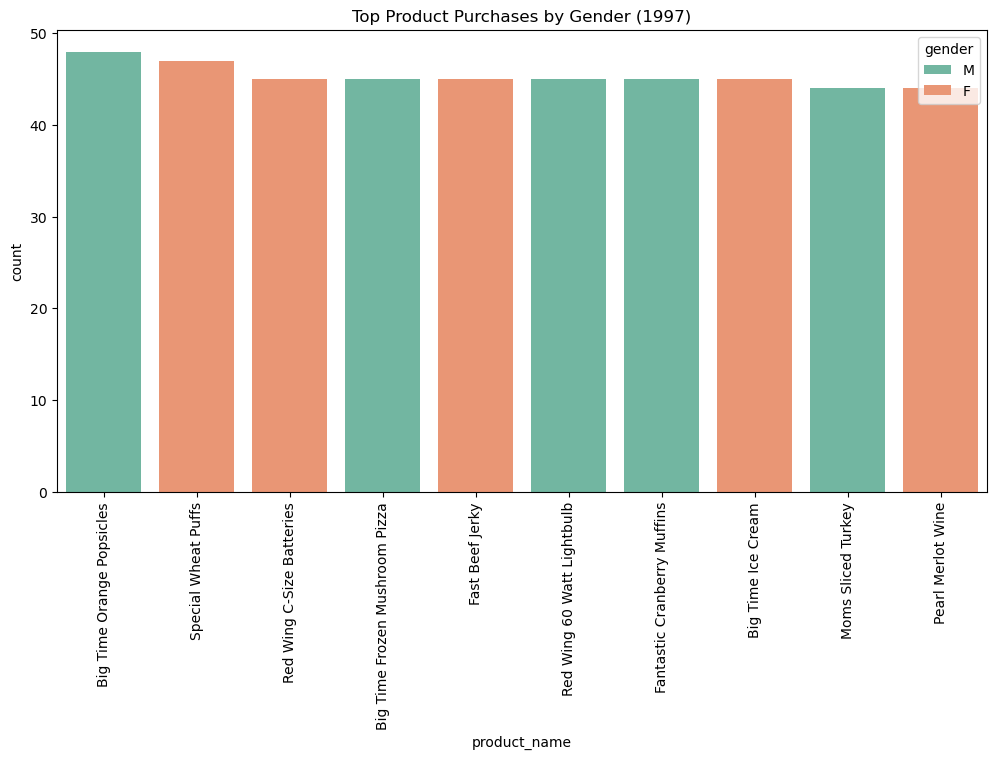

In [77]:
top_products_97 = product_by_gender_97.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_products_97, x='product_name', y='count', hue='gender', palette = 'Set2')
plt.xticks(rotation=90)
plt.title('Top Product Purchases by Gender (1997)')
plt.show()

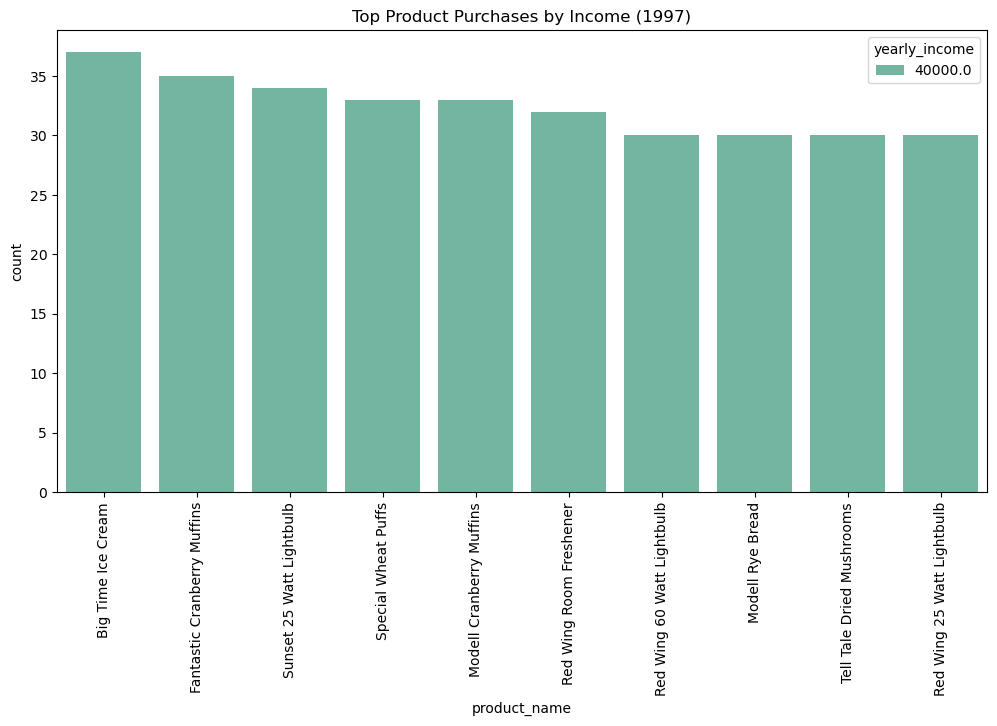

In [78]:
income_counts_97 = cx_behavior_97.groupby('yearly_income').product_name.count()
product_by_income_97 = cx_behavior_97.groupby(['yearly_income', 'product_name']).size().reset_index(name='count')
product_by_income_97['percentage'] = product_by_income_97.apply(
    lambda x: (x['count'] / income_counts_97[x['yearly_income']]) * 100, axis=1)

top_products_97 = product_by_income_97.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_products_97, x='product_name', y='count', hue='yearly_income', palette = 'Set2')
plt.xticks(rotation=90)
plt.title('Top Product Purchases by Income (1997)')
plt.show()

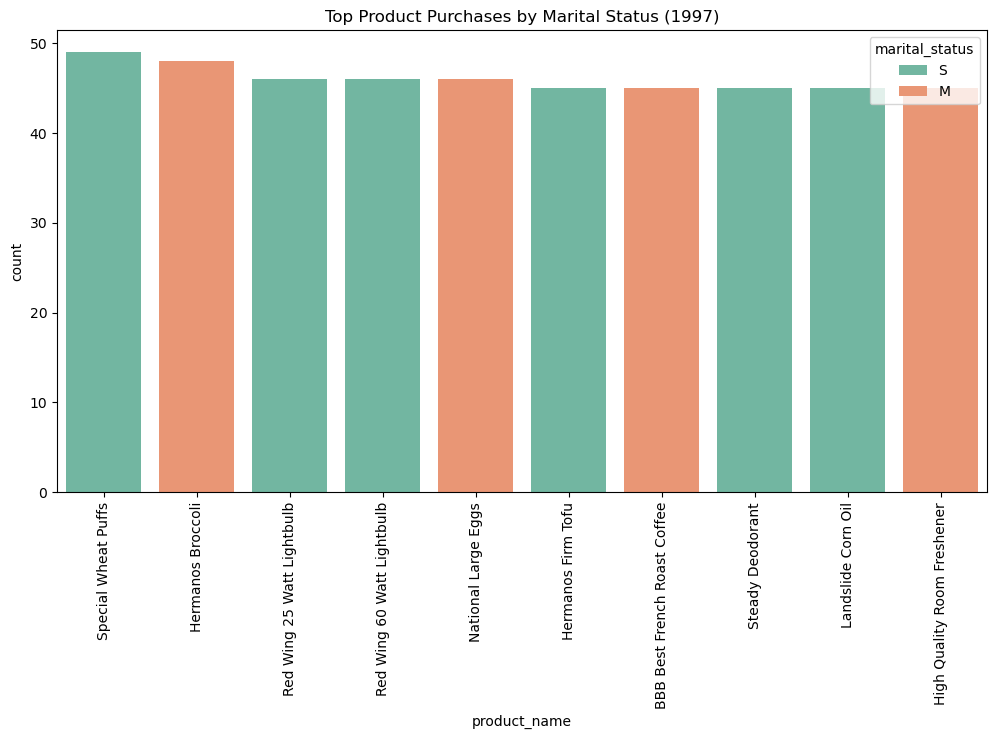

In [79]:
marital_status_counts_97 = cx_behavior_97.groupby('marital_status').product_name.count()
product_by_marital_status_97 = cx_behavior_97.groupby(['marital_status', 'product_name']).size().reset_index(name='count')
product_by_marital_status_97['percentage'] = product_by_marital_status_97.apply(
    lambda x: (x['count'] / marital_status_counts_97[x['marital_status']]) * 100, axis=1)

top_products_97 = product_by_marital_status_97.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_products_97, x='product_name', y='count', hue='marital_status', palette = 'Set2')
plt.xticks(rotation=90)
plt.title('Top Product Purchases by Marital Status (1997)')
plt.show()

In [ ]:
# b.  Do homeowners spend more than non-homeowners?

In [80]:
cx_behavior_97['cx_spendings'] = cx_behavior_97['quantity'] * cx_behavior_97['product_retail_price']
cx_behavior_98['cx_spendings'] = cx_behavior_98['quantity'] * cx_behavior_98['product_retail_price']

In [81]:
cx_behavior_97.groupby('homeowner').cx_spendings.agg(['count', 'sum', 'mean'])

,count,sum,mean
homeowner,,,
N,34259,222778.67,6.502778
Y,52578,342459.46,6.513360


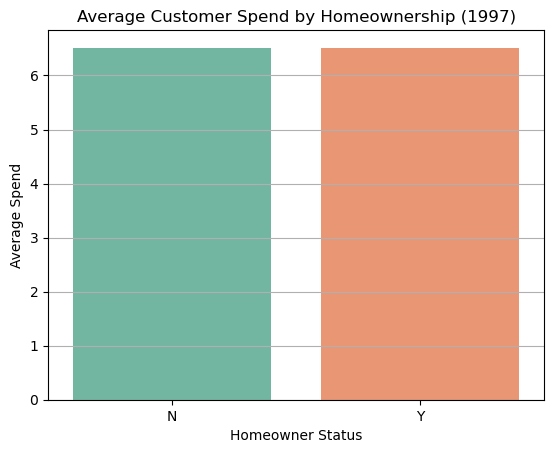

In [82]:
summary = cx_behavior_97.groupby('homeowner').cx_spendings.mean().reset_index()
sns.barplot(data=summary, x='homeowner', y='cx_spendings', hue = 'homeowner', palette='Set2')
plt.title('Average Customer Spend by Homeownership (1997)')
plt.ylabel('Average Spend')
plt.xlabel('Homeowner Status')
plt.grid(axis='y')
plt.show()

##### 2. Returns

In [ ]:
# a. What is the return rate per product/store? Which products/stores are driving the most returns?

In [83]:
transaction_97.rename(columns = {'quantity' : 'product_quantity'}, inplace = True)
transaction_98.rename(columns = {'quantity' : 'product_quantity'}, inplace = True)
returns.rename(columns = {'quantity' : 'return_quantity'}, inplace = True)

returned_97 = pd.merge(transaction_97[['product_id', 'product_quantity']], products[['product_id', 'product_retail_price', 'product_name']], on = 'product_id', how = 'left')
returned_97 = pd.merge(returned_97, returns, on = 'product_id', how = 'left')
returned_97 = pd.merge(returned_97, stores[['store_id', 'region_id', 'store_name', 'store_type']], on = 'store_id', how = 'left')
returned_97 = pd.merge(returned_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

returned_98 = pd.merge(transaction_98[['product_id', 'product_quantity']], products[['product_id', 'product_retail_price', 'product_name']], on = 'product_id', how = 'left')
returned_98 = pd.merge(returned_98, returns, on = 'product_id', how = 'left')
returned_98 = pd.merge(returned_98, stores[['store_id', 'region_id', 'store_name', 'store_type']], on = 'store_id', how = 'left')
returned_98 = pd.merge(returned_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')


returned_97['return_quantity'] = returned_97.return_quantity.fillna(0)
returned_98['return_quantity'] = returned_98.return_quantity.fillna(0)

In [84]:
# a. Return Rate by Product
by_product_97 = returned_97.groupby('product_name')[['product_quantity', 'return_quantity']].sum().reset_index()
by_product_97['return_rate_%'] = (by_product_97.return_quantity / by_product_97.product_quantity) * 100
by_product_97.head()

,product_name,product_quantity,return_quantity,return_rate_%
0,ADJ Rosy Sunglasses,1312,464.0,35.365854
1,Akron City Map,885,290.0,32.768362
2,Akron Eyeglass Screwdriver,1218,456.0,37.438424
3,American Beef Bologna,1008,392.0,38.888889
4,American Chicken Hot Dogs,489,212.0,43.353783


In [85]:
by_product_98 = returned_98.groupby('product_name')[['product_quantity', 'return_quantity']].sum().reset_index()
by_product_98['return_rate_%'] = (by_product_98.return_quantity / by_product_98.product_quantity) * 100
by_product_98.head()

,product_name,product_quantity,return_quantity,return_rate_%
0,ADJ Rosy Sunglasses,3648,1120.0,30.701754
1,Akron City Map,1760,555.0,31.534091
2,Akron Eyeglass Screwdriver,2849,1040.0,36.504037
3,American Beef Bologna,2178,791.0,36.317723
4,American Chicken Hot Dogs,969,428.0,44.169247


In [86]:
# b. Return Rate by Store
by_store_97 = returned_97.groupby('store_name')[['product_quantity', 'return_quantity']].sum().reset_index()
by_store_97['return_rate_%'] = (by_store_97['return_quantity'] / by_store_97['product_quantity']) * 100
by_store_97

,store_name,product_quantity,return_quantity,return_rate_%
0,Store 1,39144,14807.0,37.826998
1,Store 10,37250,14258.0,38.276510
2,Store 11,82274,31649.0,38.467803
3,Store 12,67410,25526.0,37.866785
4,Store 13,113326,41766.0,36.854738
5,Store 15,81529,30985.0,38.004882
6,Store 16,82977,31625.0,38.112971
7,Store 17,113493,43198.0,38.062259
8,Store 18,16246,6198.0,38.150929
9,Store 19,61888,23603.0,38.138250


In [87]:
by_store_98 = returned_98.groupby('store_name')[['product_quantity', 'return_quantity']].sum().reset_index()
by_store_98['return_rate_%'] = (by_store_98['return_quantity'] / by_store_98['product_quantity']) * 100
by_store_98

,store_name,product_quantity,return_quantity,return_rate_%
0,Store 1,84842,31968.0,37.679451
1,Store 10,79568,30090.0,37.816710
2,Store 11,173324,66406.0,38.313217
3,Store 12,145316,54556.0,37.543010
4,Store 13,237770,87301.0,36.716575
5,Store 15,171300,64513.0,37.660829
6,Store 16,173803,65765.0,37.838818
7,Store 17,235831,89337.0,37.881788
8,Store 18,35192,13150.0,37.366447
9,Store 19,132089,49611.0,37.558767


In [ ]:
# b. Are certain regions or store types more prone to returns?

In [88]:
region_returns = returned_97.groupby('sales_region')[['product_quantity', 'return_quantity']]\
.sum().reset_index()
region_returns['return_rate_%'] = (region_returns['return_quantity'] / region_returns['product_quantity']) * 100
region_returns

,sales_region,product_quantity,return_quantity,return_rate_%
0,Canada West,80583,30408.0,37.735006
1,Mexico Central,229833,87471.0,38.058503
2,Mexico South,70552,26999.0,38.268228
3,Mexico West,39144,14807.0,37.826998
4,North West,582328,220923.0,37.937898
5,South West,227158,85830.0,37.784274


In [89]:
store_returns = returned_97.groupby('store_type')[['product_quantity', 'return_quantity']].sum().reset_index()
store_returns['return_rate_%'] = (store_returns['return_quantity'] / store_returns['product_quantity']) * 100
store_returns

,store_type,product_quantity,return_quantity,return_rate_%
0,Deluxe Supermarket,480480,181793.0,37.835706
1,Gourmet Supermarket,103481,39627.0,38.293986
2,Mid-Size Grocery,89159,33349.0,37.403964
3,Supermarket,556478,211669.0,38.037263


##### 3. Inventory Issues

In [90]:
# a. Identify stock vs transaction mismatch (i.e., products sold without recent stock date).

# transaction_97['stock_age_days'] = (transaction_97['transaction_date'] - transaction_97['stock_date']).dt.days
# outdated_stock = transaction_97[transaction_97['stock_age_days'] > 30]
# outdated_stock


transaction_97[transaction_97.stock_date.isna()]

,transaction_date,stock_date,product_id,customer_id,store_id,product_quantity


In [91]:
# transaction_98['stock_age_days'] = (transaction_98['transaction_date'] - transaction_98['stock_date']).dt.days
# outdated_stock = transaction_98[transaction_98['stock_age_days'] > 30]
# outdated_stock


transaction_98[transaction_98.stock_date.isna()]

,transaction_date,stock_date,product_id,customer_id,store_id,product_quantity


In [ ]:
# b. Are there periods where demand exceeds stock, indicating potential out-of-stock situations?

In [92]:
transaction_97['stock_transaction_date_diff'] = (transaction_97['transaction_date']\
                                                 - transaction_97['stock_date']).dt.days

high_demand_old_stock_97 = transaction_97[(transaction_97['stock_transaction_date_diff'] > 30) &
                                        transaction_97['product_quantity'] > 50]
high_demand_old_stock_97

,transaction_date,stock_date,product_id,customer_id,store_id,product_quantity,stock_transaction_date_diff


In [93]:
transaction_98['stock_transaction_date_diff'] = (transaction_98['transaction_date']\
                                                 - transaction_98['stock_date']).dt.days

high_demand_old_stock_98 = transaction_98[(transaction_98['stock_transaction_date_diff'] > 30) &
                                        transaction_98['product_quantity'] > 50]
high_demand_old_stock_98

,transaction_date,stock_date,product_id,customer_id,store_id,product_quantity,stock_transaction_date_diff


### III. Trend Analysis & Time Series

In [94]:
# a. How do monthly sales and returns trend over time?
all_transaction = pd.concat([transaction_97, transaction_98])
trend = pd.merge(all_transaction[['transaction_date', 'product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price']], on = 'product_id', how = 'left')
trend = pd.merge(trend, returns[['product_id', 'return_date', 'return_quantity']], on = 'product_id', how = 'left')
trend = pd.merge(trend, stores[['store_id', 'last_remodel_date']], on = 'store_id', how = 'left')

trend['sales'] = trend['product_quantity'] * trend['product_retail_price']

trend['return_quantity'] = trend['return_quantity'].fillna(0)

trend['month'] = trend['transaction_date'].dt.to_period('M')

In [95]:
monthly_sales_returns = trend.groupby('month').agg({'sales': 'sum','return_quantity': 'sum'})\
.reset_index()
monthly_sales_returns

,month,sales,return_quantity
0,1997-01,209155.21,37673.0
1,1997-02,202653.35,36837.0
2,1997-03,228955.45,41354.0
3,1997-04,198211.25,35792.0
4,1997-05,204761.58,36966.0
5,1997-06,207172.85,37051.0
6,1997-07,228589.52,41295.0
7,1997-08,212992.10,38023.0
8,1997-09,202558.63,35956.0
9,1997-10,194219.00,34881.0


In [ ]:
# b. Are there seasonal spikes in purchases or returns?

In [96]:
trend['month_names'] = trend['transaction_date'].dt.month_name()
def seasons(x):
    if x in ['March', 'April', 'May']:
        return 'Spring'
    elif x in ['June', 'July', 'August']:
        return 'Summer'
    elif x in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'

trend['season'] = trend['month_names'].apply(seasons)
trend.head()

,transaction_date,product_id,store_id,product_quantity,product_retail_price,return_date,return_quantity,last_remodel_date,sales,month,month_names,season
0,1997-01-01,869,6,5,2.12,1997-01-01,1.0,1991-03-13,10.6,1997-01,January,Winter
1,1997-01-01,869,6,5,2.12,1997-06-01,1.0,1991-03-13,10.6,1997-01,January,Winter
2,1997-01-01,869,6,5,2.12,1997-11-02,1.0,1991-03-13,10.6,1997-01,January,Winter
3,1997-01-01,869,6,5,2.12,1998-03-03,1.0,1991-03-13,10.6,1997-01,January,Winter
4,1997-01-01,869,6,5,2.12,1998-05-06,2.0,1991-03-13,10.6,1997-01,January,Winter


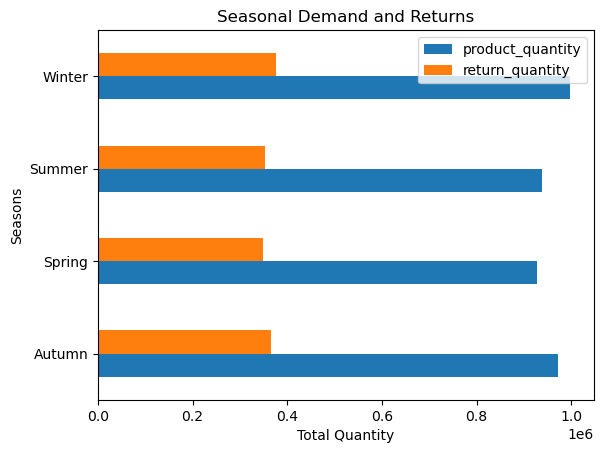

In [98]:
%matplotlib inline
trend.groupby('season')[['product_quantity', 'return_quantity']].sum().plot(kind='barh', title='Seasonal Demand and Returns')
plt.xlabel('Total Quantity')
plt.ylabel('Seasons')
plt.show()

In [ ]:
# c. Is there a change in product demand after store remodel dates?

In [99]:
trend['remodel_status'] = trend['transaction_date'] > trend['last_remodel_date']
trend['remodel_status'] = trend['remodel_status'].map({True : 'After Remodel', False : 'Before Remodel'})
demand_comp = trend.groupby('remodel_status').product_quantity.sum().reset_index()

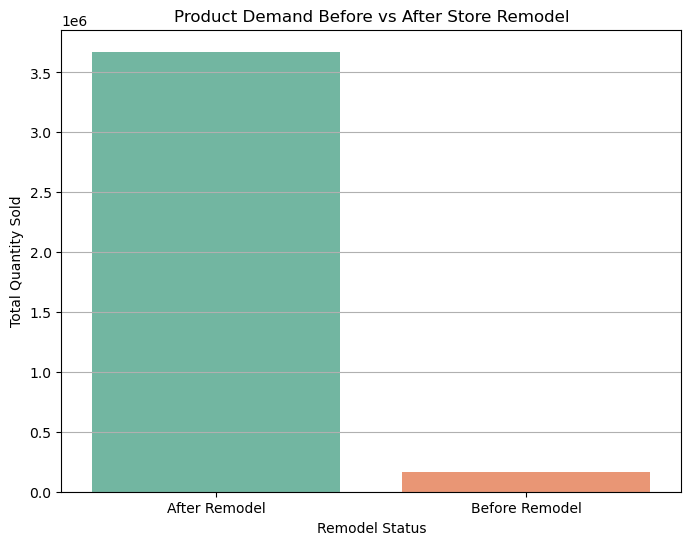

In [100]:
plt.figure(figsize = (8, 6))
sns.barplot(data = demand_comp, x='remodel_status', y='product_quantity', hue = 'remodel_status', palette = 'Set2')
plt.title('Product Demand Before vs After Store Remodel')
plt.xlabel('Remodel Status')
plt.ylabel('Total Quantity Sold')
plt.grid(axis = 'y')
plt.show()

### IV. Customer Segmentation

In [101]:
# a. Cluster customers based on:
#    i. Yearly income,  ii. Purchase quantity,  iii. Number of children and   iv. Region or store visited

transaction_97.rename(columns = {'quantity' : 'product_quantity'}, inplace = True)
transaction_98.rename(columns = {'quantity' : 'product_quantity'}, inplace = True)
returns.rename(columns = {'quantity' : 'return_quantity'}, inplace = True)

cx_seg_97 = pd.merge(customers[['customer_id', 'yearly_income', 'total_children']], transaction_97[['customer_id', 'store_id', 'product_quantity']], on = 'customer_id', how = 'left')
cx_seg_97 = pd.merge(cx_seg_97, stores[['store_id', 'region_id', 'store_type']], on = 'store_id', how = 'left')
cx_seg_97 = pd.merge(cx_seg_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

cx_seg_98 = pd.merge(customers[['customer_id', 'yearly_income', 'total_children']], transaction_98[['customer_id', 'store_id', 'product_quantity']], on = 'customer_id', how = 'left')
cx_seg_98 = pd.merge(cx_seg_98, stores[['store_id', 'region_id', 'store_type']], on = 'store_id', how = 'left')
cx_seg_98 = pd.merge(cx_seg_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

In [102]:
# a. i. Yearly Income
cx_yearly_income_97 = cx_seg_97.groupby('customer_id').agg({'yearly_income' : 'first', 'customer_id' : 'count'}).rename(columns = {'customer_id' : 'purchase_count'}).reset_index()
cx_yearly_income_97.head()

,customer_id,yearly_income,purchase_count
0,1,40000.0,1
1,2,80000.0,1
2,3,60000.0,17
3,4,20000.0,1
4,5,40000.0,1


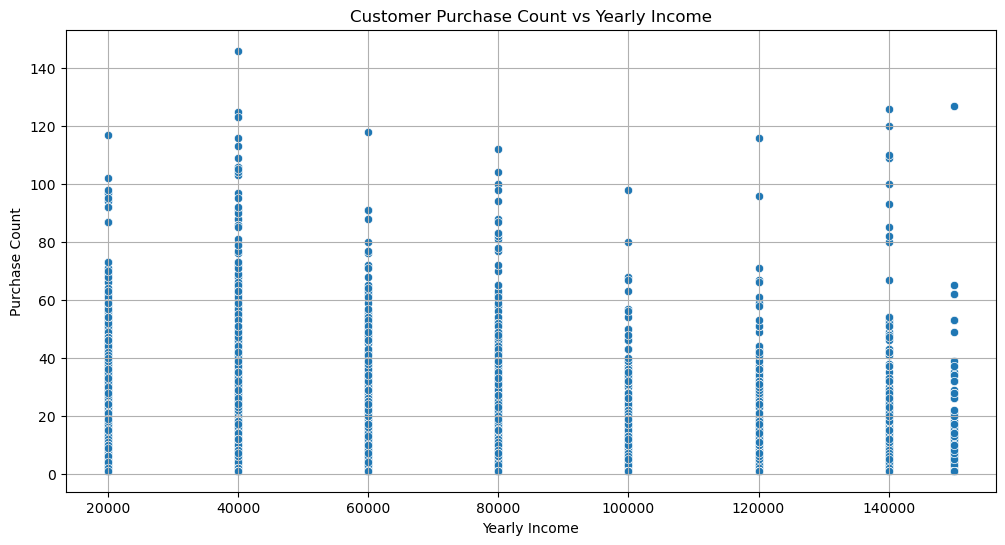

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=cx_yearly_income_97, x='yearly_income', y='purchase_count')
plt.title('Customer Purchase Count vs Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Purchase Count')
plt.grid()
plt.show()

In [104]:
cx_yearly_income_98 = cx_seg_98.groupby('customer_id').agg({'yearly_income' : 'first', 'customer_id' : 'count'}).rename(columns = {'customer_id' : 'purchase_count'}).reset_index()
cx_yearly_income_98.head()

,customer_id,yearly_income,purchase_count
0,1,40000.0,1
1,2,80000.0,1
2,3,60000.0,13
3,4,20000.0,1
4,5,40000.0,1


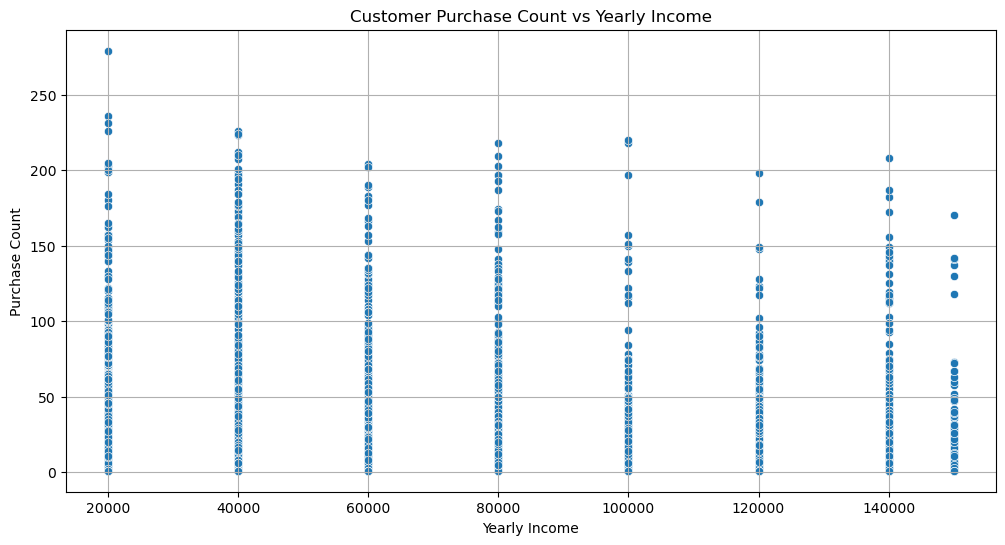

In [105]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=cx_yearly_income_98, x='yearly_income', y='purchase_count')
plt.title('Customer Purchase Count vs Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Purchase Count')
plt.grid()
plt.show()

In [ ]:
# a. ii. Purchase Quantity

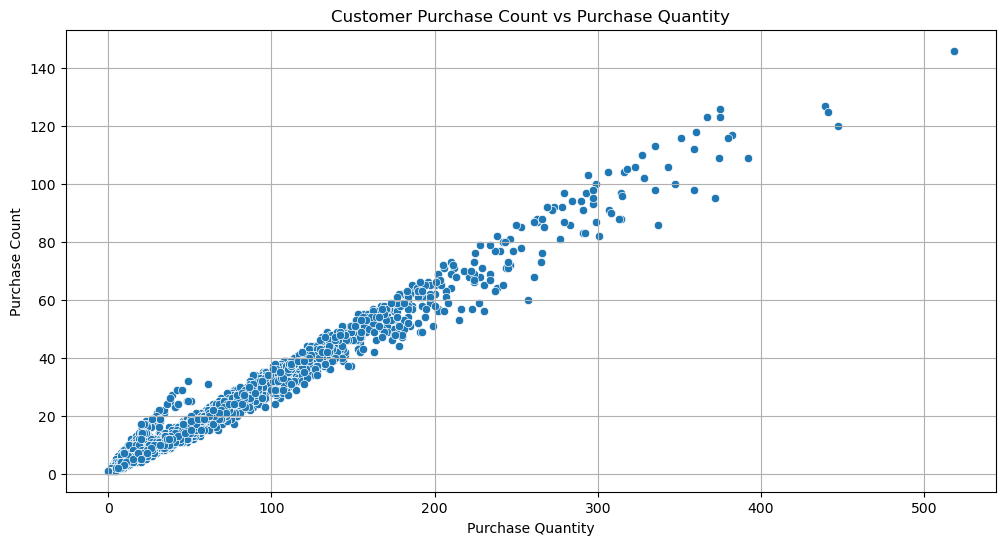

In [106]:
cx_purchase_qty_97 = cx_seg_97.groupby('customer_id').agg({'product_quantity' : 'sum', 'customer_id' : 'count'}).rename(columns = {'customer_id' : 'purchase_count'}).reset_index()
# cx_purchase_qty_97

plt.figure(figsize=(12,6))
sns.scatterplot(data=cx_purchase_qty_97, x='product_quantity', y='purchase_count')
plt.title('Customer Purchase Count vs Purchase Quantity')
plt.xlabel('Purchase Quantity')
plt.ylabel('Purchase Count')
plt.grid()
plt.show()

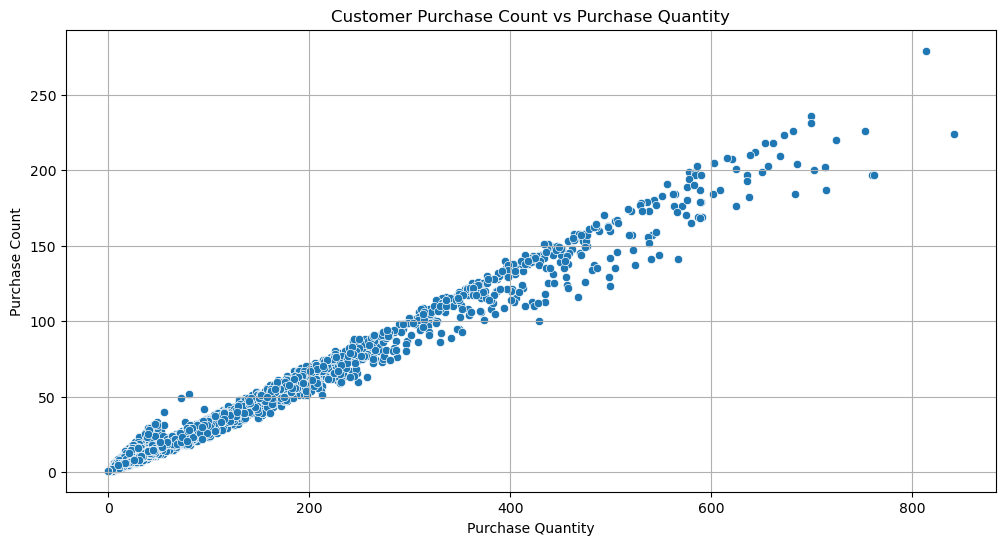

In [107]:
cx_purchase_qty_98 = cx_seg_98.groupby('customer_id').agg({'product_quantity' : 'sum', 'customer_id' : 'count'}).rename(columns = {'customer_id' : 'purchase_count'}).reset_index()
# cx_purchase_qty_97

plt.figure(figsize=(12,6))
sns.scatterplot(data=cx_purchase_qty_98, x='product_quantity', y='purchase_count')
plt.title('Customer Purchase Count vs Purchase Quantity')
plt.xlabel('Purchase Quantity')
plt.ylabel('Purchase Count')
plt.grid()
plt.show()

In [ ]:
# a. iii. Number of Children

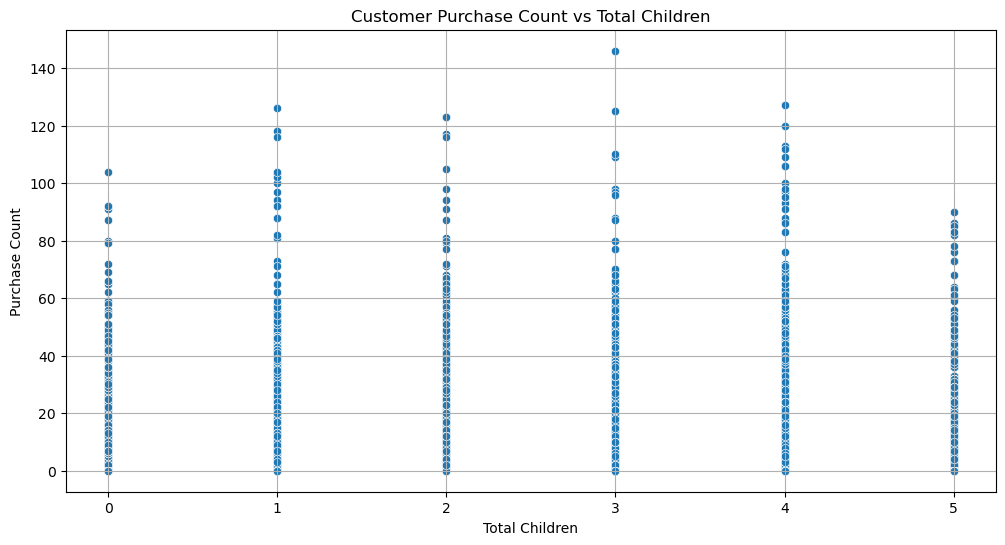

In [108]:
cx_children_97 = cx_seg_97.groupby('customer_id').agg({'total_children' : 'first', 'product_quantity' : 'count'}).rename(columns = {'product_quantity' : 'purchase_count'}).reset_index()
# cx_purchase_qty_97

plt.figure(figsize=(12,6))
sns.scatterplot(data=cx_children_97, x='total_children', y='purchase_count')
plt.title('Customer Purchase Count vs Total Children')
plt.xlabel('Total Children')
plt.ylabel('Purchase Count')
plt.grid()
plt.show()

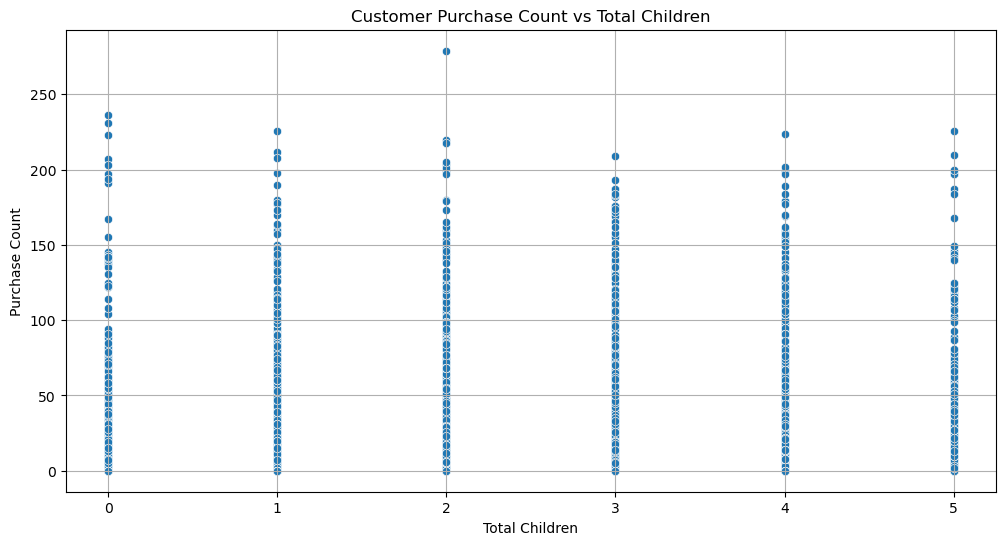

In [109]:
cx_children_98 = cx_seg_98.groupby('customer_id').agg({'total_children' : 'first', 'product_quantity' : 'count'}).rename(columns = {'product_quantity' : 'purchase_count'}).reset_index()
# cx_purchase_qty_97

plt.figure(figsize=(12,6))
sns.scatterplot(data=cx_children_98, x='total_children', y='purchase_count')
plt.title('Customer Purchase Count vs Total Children')
plt.xlabel('Total Children')
plt.ylabel('Purchase Count')
plt.grid()
plt.show()

In [ ]:
# a. iv. Region or Store visited

In [110]:
# cx_region_visited_97 = cx_seg_97.groupby('sales_region').agg({'store_type' : 'count', 'customer_id' : 'count'}).reset_index()
# cx_region_visited_97
# cx_store_type_visited_97 = cx_seg_97.groupby('store_type').agg({'sales_region' : 'count', 'customer_id' : 'count'}).reset_index()
# cx_store_type_visited_97

In [111]:
df_encoded_97 = pd.get_dummies(cx_seg_97[['customer_id', 'sales_region', 'store_type']], 
                            columns=['sales_region', 'store_type'])
cx_cluster_region_store = df_encoded_97.groupby('customer_id').sum().reset_index()


df_encoded_98 = pd.get_dummies(cx_seg_98[['customer_id', 'sales_region', 'store_type']], 
                            columns=['sales_region', 'store_type'])
cx_cluster_region_store = df_encoded_98.groupby('customer_id').sum().reset_index()

In [112]:
cx_cluster_region_store_97 = df_encoded_97.groupby('customer_id').sum().reset_index()
cx_cluster_region_store_98 = df_encoded_98.groupby('customer_id').sum().reset_index()

In [ ]:
# b. Which customer segments are most profitable?

In [113]:
cx_seg_97 = pd.merge(customers[['customer_id', 'gender']], transaction_97[['customer_id', 'product_id', 'product_quantity']], on = 'customer_id', how = 'left')
cx_seg_97 = pd.merge(cx_seg_97, products[['product_id', 'product_retail_price', 'product_cost']], on = 'product_id', how = 'left')

cx_seg_98 = pd.merge(customers[['customer_id', 'gender']], transaction_98[['customer_id', 'product_id', 'product_quantity']], on = 'customer_id', how = 'left')
cx_seg_98 = pd.merge(cx_seg_98, products[['product_id', 'product_retail_price', 'product_cost']], on = 'product_id', how = 'left')

cx_seg_97['profit'] = (cx_seg_97['product_quantity'] * cx_seg_97['product_retail_price']) - cx_seg_97['product_cost']
cx_seg_98['profit'] = (cx_seg_98['product_quantity'] * cx_seg_98['product_retail_price']) - cx_seg_98['product_cost']

In [114]:
cx_seg_97.groupby('gender').profit.sum()   # most profitable cx by gender
cx_seg_97.groupby('customer_id').profit.sum().sort_values(ascending = False).head(5)   # most profitable cx by id

customer_id
4021    953.78
8452    875.38
5295    841.61
4727    821.56
4094    773.48
Name: profit, dtype: float64

In [115]:
cx_seg_98.groupby('gender').profit.sum()   # most profitable cx by gender
cx_seg_98.groupby('customer_id').profit.sum().sort_values(ascending = False).head(5)    # most profitable cx by id

customer_id
5466    1526.11
1787    1517.67
1770    1433.20
4386    1389.33
4026    1380.27
Name: profit, dtype: float64

In [ ]:
# c. Which segment prefers which product brand?

In [116]:
cx_seg_97 = pd.merge(customers[['customer_id', 'gender']], transaction_97[['customer_id', 'product_id']], on = 'customer_id', how = 'left')
cx_seg_97 = pd.merge(cx_seg_97, products[['product_id', 'product_brand']], on = 'product_id', how = 'inner')

cx_seg_98 = pd.merge(customers[['customer_id', 'gender']], transaction_98[['customer_id', 'product_id']], on = 'customer_id', how = 'left')
cx_seg_98 = pd.merge(cx_seg_98, products[['product_id', 'product_brand']], on = 'product_id', how = 'inner')

In [117]:
cx_seg_97.groupby(['gender', 'product_brand']).product_brand.count().sort_values(ascending = False)

                                        # OR

# prod_pref_by_gender_97 = cx_seg_97.groupby(['gender', 'product_brand']).size().reset_index(name = 'purchase_count')
# prod_pref_by_gender_97.sort_values(by = ['gender', 'purchase_count'], ascending = [True, False])

gender  product_brand
M       Hermanos         1385
F       Hermanos         1344
        Tell Tale        1314
M       Tell Tale        1268
        Tri-State        1234
                         ... 
F       King               24
M       Prelude            23
F       Toretti            23
        ADJ                18
        Symphony           17
Name: product_brand, Length: 222, dtype: int64

In [118]:
cx_seg_98.groupby(['gender', 'product_brand']).product_brand.count().sort_values(ascending = False)

gender  product_brand
F       Hermanos         2729
        Ebony            2640
M       Hermanos         2613
        Ebony            2598
F       Tri-State        2585
                         ... 
M       Symphony           57
F       Prelude            53
        King               53
M       Toretti            53
        King               45
Name: product_brand, Length: 222, dtype: int64

### V. Geographical & Regionala Analysis

In [ ]:
# a. Which regions generate the most revenue?

In [119]:
geo_analysis_97 = pd.merge(transaction_97[['product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price']], on = 'product_id', how = 'left')
geo_analysis_97 = pd.merge(geo_analysis_97, stores[['store_id', 'region_id', 'store_city', 'grocery_sqft']], on = 'store_id', how = 'left')
geo_analysis_97 = pd.merge(geo_analysis_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

geo_analysis_98 = pd.merge(transaction_98[['product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price']], on = 'product_id', how = 'left')
geo_analysis_98 = pd.merge(geo_analysis_98, stores[['store_id', 'region_id', 'store_city', 'grocery_sqft']], on = 'store_id', how = 'left')
geo_analysis_98 = pd.merge(geo_analysis_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')


geo_analysis_97['revenue'] =  geo_analysis_97['product_quantity'] * geo_analysis_97['product_retail_price']
geo_analysis_98['revenue'] =  geo_analysis_98['product_quantity'] * geo_analysis_98['product_retail_price']

In [120]:
geo_analysis_97.groupby('sales_region').revenue.sum().sort_values(ascending = False)

sales_region
North West      406070.29
South West      154726.66
Central West      4441.18
Name: revenue, dtype: float64

In [121]:
geo_analysis_98.groupby('sales_region').revenue.sum().sort_values(ascending = False)

sales_region
North West        441756.43
Mexico Central    330362.03
South West        166078.12
Canada West       107674.34
Mexico South       87253.65
Mexico West        61299.98
Central West        4883.76
Name: revenue, dtype: float64

In [ ]:
# b. Which city-level stores outperform others in terms of revenue per sqft?

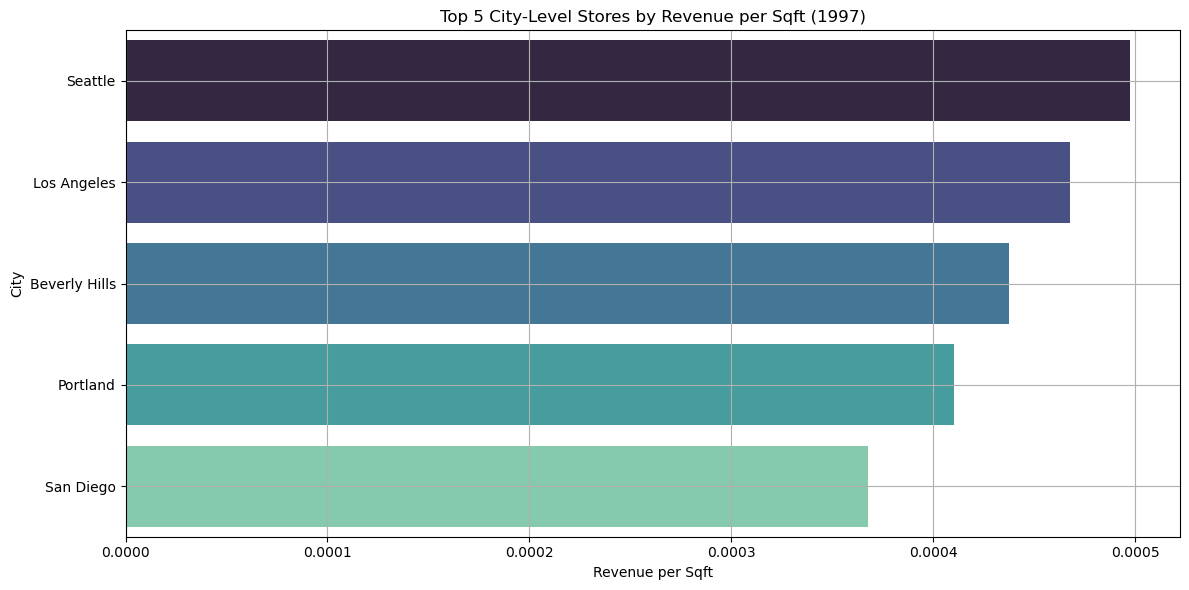

In [122]:
city_rev_sqft_97 = geo_analysis_97.groupby('store_city').agg({'revenue' : 'sum', 'grocery_sqft' : 'sum'}).reset_index()
city_rev_sqft_97['revenue_per_sqft'] = city_rev_sqft_97['revenue'] / city_rev_sqft_97['grocery_sqft']
city_rev_sqft_97.sort_values(by='revenue_per_sqft', ascending=False, inplace=True)


plt.figure(figsize=(12,6))
sns.barplot(data=city_rev_sqft_97.head(5), x='revenue_per_sqft', y='store_city', hue = 'store_city', palette='mako')
plt.title('Top 5 City-Level Stores by Revenue per Sqft (1997)')
plt.xlabel('Revenue per Sqft')
plt.ylabel('City')
plt.grid()
plt.tight_layout()
plt.show()

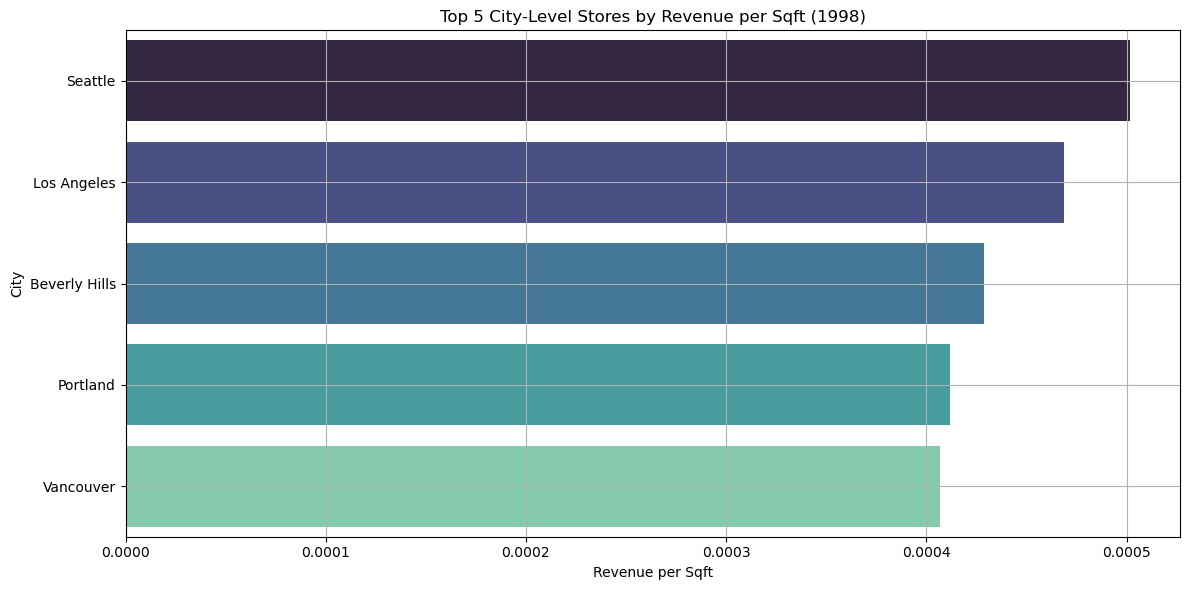

In [123]:
city_rev_sqft_98 = geo_analysis_98.groupby('store_city').agg({'revenue' : 'sum', 'grocery_sqft' : 'sum'}).reset_index()
city_rev_sqft_98['revenue_per_sqft'] = city_rev_sqft_98['revenue'] / city_rev_sqft_98['grocery_sqft']
city_rev_sqft_98.sort_values(by='revenue_per_sqft', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=city_rev_sqft_98.head(5), x='revenue_per_sqft', y='store_city', hue = 'store_city', palette='mako')
plt.title('Top 5 City-Level Stores by Revenue per Sqft (1998)')
plt.xlabel('Revenue per Sqft')
plt.ylabel('City')
plt.grid()
plt.tight_layout()
plt.show()

### VI. Profitability Analysis

In [124]:
# a.  Calculate:
#      i. Gross profit per product: (product_retail_price - product_cost) * quantity
#      ii. Profit contribution by store and region

profit_analysis_97 = pd.merge(transaction_97[['product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price', 'product_cost', 'recyclable']], on = 'product_id', how = 'left')
profit_analysis_97 = pd.merge(profit_analysis_97, stores[['store_id', 'region_id']], on = 'store_id', how = 'left')
profit_analysis_97 = pd.merge(profit_analysis_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

profit_analysis_98 = pd.merge(transaction_98[['product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price', 'product_cost', 'recyclable']], on = 'product_id', how = 'left')
profit_analysis_98 = pd.merge(profit_analysis_98, stores[['store_id', 'region_id']], on = 'store_id', how = 'left')
profit_analysis_98 = pd.merge(profit_analysis_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

profit_analysis_97['gross_profit'] = (profit_analysis_97['product_retail_price'] - profit_analysis_97['product_cost']) * profit_analysis_97['product_quantity']
profit_analysis_98['gross_profit'] = (profit_analysis_98['product_retail_price'] - profit_analysis_98['product_cost']) * profit_analysis_98['product_quantity']

In [125]:
# a)  i. Gross Profit per product
profit_analysis_97.groupby('product_id').gross_profit.sum().reset_index().sort_values(by = 'gross_profit', ascending = False)

,product_id,gross_profit
1427,1428,619.01
951,952,512.64
711,712,509.96
1018,1019,501.41
1414,1415,494.00
...,...,...
783,784,42.39
256,257,38.48
1050,1051,38.15
295,296,38.07


In [126]:
profit_analysis_98.groupby('product_id').gross_profit.sum().reset_index().sort_values(by = 'gross_profit', ascending = False)

,product_id,gross_profit
1309,1310,1073.16
730,731,1070.67
1427,1428,1051.54
308,309,1042.47
940,941,1036.35
...,...,...
1304,1305,94.54
44,45,94.36
295,296,94.23
143,144,93.86


In [ ]:
# a)  ii. Profit Contribution by store and region

In [127]:
profit_analysis_97.groupby('store_id').gross_profit.sum().reset_index().sort_values(by = 'gross_profit', ascending = False)

,store_id,gross_profit
5,13,52026.05
9,17,44642.41
4,11,32874.22
3,7,32552.90
12,24,32497.52
1,3,31522.79
7,15,31350.03
8,16,29568.12
2,6,27291.82
11,23,14494.42


In [128]:
profit_analysis_98.groupby('store_id').gross_profit.sum().reset_index().sort_values(by = 'gross_profit', ascending = False)

,store_id,gross_profit
11,12,52257.30
7,8,51991.14
18,19,50954.98
12,13,49688.60
16,17,49445.55
20,21,48653.16
14,15,37798.44
15,16,36343.23
10,11,35983.05
2,3,34532.22


In [ ]:
# b. Are recyclable products more profitable?

In [129]:
profit_analysis_97.groupby('recyclable').gross_profit.sum().reset_index().sort_values(by = 'gross_profit', ascending = False)

,recyclable,gross_profit
1,Yes,192451.62
0,No,144673.86


### VII. Prescriptive Analytics

In [130]:
# a. Which products should be promoted in low-performing regions?

In [131]:
pres_analysis_97 = pd.merge(transaction_97[['product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price', 'product_name']], on = 'product_id', how = 'left')
pres_analysis_97 = pd.merge(pres_analysis_97, returns[['product_id', 'return_quantity']], on = 'product_id', how = 'left')
pres_analysis_97 = pd.merge(pres_analysis_97, stores[['store_id', 'region_id']], on = 'store_id', how = 'left')
pres_analysis_97 = pd.merge(pres_analysis_97, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

pres_analysis_98 = pd.merge(transaction_98[['product_id', 'store_id', 'product_quantity']], products[['product_id', 'product_retail_price', 'product_name']], on = 'product_id', how = 'left')
pres_analysis_98 = pd.merge(pres_analysis_98, returns[['product_id', 'return_quantity']], on = 'product_id', how = 'left')
pres_analysis_98 = pd.merge(pres_analysis_98, stores[['store_id', 'region_id']], on = 'store_id', how = 'left')
pres_analysis_98 = pd.merge(pres_analysis_98, regions[['region_id', 'sales_region']], on = 'region_id', how = 'left')

pres_analysis_97['revenue'] = pres_analysis_97['product_quantity'] * pres_analysis_97['product_retail_price']
pres_analysis_98['revenue'] = pres_analysis_98['product_quantity'] * pres_analysis_98['product_retail_price']

In [132]:
low_perf_prod_97 = pres_analysis_97.groupby(['sales_region', 'product_name']).revenue.sum().reset_index().sort_values(by = ['sales_region', 'revenue'])
low_perf_prod_97

,sales_region,product_name,revenue
656,Central West,PigTail Apple Cinnamon Waffles,0.55
400,Central West,Golden Apple Cinnamon Waffles,0.62
44,Central West,Best Choice Lemon Cookies,0.76
733,Central West,Red Wing Counter Cleaner,0.93
673,Central West,PigTail Low Fat Waffles,1.02
...,...,...,...
2743,South West,Carrington Frozen Mushroom Pizza,1790.40
3224,South West,Hermanos Mandarin Oranges,1816.24
2568,South West,Big Time Frozen Cauliflower,1912.32
3716,South West,Red Wing Frying Pan,1967.24


In [133]:
low_perf_prod_98 = pres_analysis_98.groupby(['sales_region', 'product_name']).revenue.sum().reset_index().sort_values(by = ['sales_region', 'revenue'])
low_perf_prod_98

,sales_region,product_name,revenue
79,Canada West,Best Choice Lemon Cookies,10.64
597,Canada West,Fast Low Fat BBQ Chips,12.00
1214,Canada West,Pleasant Canned String Beans,14.40
322,Canada West,Choice Bubble Gum,14.84
688,Canada West,Golden Fajita French Fries,15.90
...,...,...,...
9673,South West,Horatio Low Fat Chips,2079.00
8872,South West,Big Time Beef TV Dinner,2271.71
9528,South West,Hermanos Green Pepper,2285.12
9277,South West,Even Better Large Curd Cottage Cheese,2302.85


In [ ]:
# b. Should stores with high return rates be closed or remodeled?

In [134]:
pres_analysis_97.return_quantity.isna().sum()
pres_analysis_98.return_quantity.isna().sum()

np.int64(2332)

In [135]:
pres_analysis_97['return_quantity'] = pres_analysis_97.return_quantity.fillna(0)
pres_analysis_98['return_quantity'] = pres_analysis_98.return_quantity.fillna(0)

In [136]:
store_sales_97 = pres_analysis_97.groupby('store_id').product_quantity.sum().reset_index()
store_returns_97 = pres_analysis_97.groupby('store_id').return_quantity.sum().reset_index()

store_sales_98 = pres_analysis_98.groupby('store_id').product_quantity.sum().reset_index()
store_returns_98 = pres_analysis_98.groupby('store_id').return_quantity.sum().reset_index()

store_return_rate_97 = pd.merge(store_sales_97, store_returns_97, on='store_id', how='left')
store_return_rate_98 = pd.merge(store_sales_98, store_returns_98, on='store_id', how='left')

store_return_rate_97['return_rate_%'] = (store_return_rate_97['return_quantity'] / store_return_rate_97['product_quantity']) * 100
store_return_rate_98['return_rate_%'] = (store_return_rate_98['return_quantity'] / store_return_rate_98['product_quantity']) * 100

high_return_stores_97 = store_return_rate_97.sort_values(by = 'return_rate_%', ascending = False).reset_index() 
high_return_stores_98 = store_return_rate_98.sort_values(by = 'return_rate_%', ascending = False).reset_index()

In [137]:
high_return_stores_97  
#  First 3 stores can be closed since they are having more than 70% return rate
#  and rest of them can be remodelled

,index,store_id,product_quantity,return_quantity,return_rate_%
0,6,14,9428,6881.0,72.984726
1,0,2,10165,7358.0,72.385637
2,10,22,10236,7238.0,70.711215
3,5,13,192304,71719.0,37.294596
4,2,6,97653,36368.0,37.242071
5,1,3,113803,42371.0,37.231883
6,3,7,118987,44184.0,37.133468
7,7,15,115366,42678.0,36.993568
8,4,11,121566,44876.0,36.914927
9,11,23,52876,19509.0,36.895756


In [138]:
# c. Recommend inventory levels based on average monthly sales and returns.
transactions = pd.concat([transaction_97, transaction_98], ignore_index = True)

inventory = pd.merge(transactions[['transaction_date', 'product_id', 'product_quantity']], products[['product_id', 'product_name']], on='product_id', how='left')
inventory = pd.merge(inventory, returns[['product_id', 'return_quantity', 'return_date']], on='product_id', how='left')

inventory['transaction_date'] = pd.to_datetime(inventory['transaction_date'])
inventory['month'] = inventory['transaction_date'].dt.to_period('M')

inventory['return_quantity'] = inventory.return_quantity.fillna(0)

In [139]:
monthly_data = inventory.groupby(['product_id', 'product_name', 'month']).agg(
    {'product_quantity' : 'sum', 'return_quantity' : 'sum'}).reset_index()


avg_monthly = monthly_data.groupby(['product_id', 'product_name']).agg(
    {'product_quantity' : 'mean', 'return_quantity' : 'mean'}).reset_index()

avg_monthly.rename(columns = {'product_quantity' : 'avg_monthly_sales', 
                              'return_quantity' : 'avg_monthly_returns'}, inplace = True)

# recommended_inventory = sales + returns + buffer stock (taking 20% buffer stock)
avg_monthly['recommended_inventory'] = avg_monthly['avg_monthly_sales'] + avg_monthly['avg_monthly_returns'] + ((20/100) * avg_monthly['avg_monthly_sales'])

In [140]:
avg_monthly.sort_values(by='recommended_inventory', ascending=False).head(10)

,product_id,product_name,avg_monthly_sales,avg_monthly_returns,recommended_inventory
886,887,Monarch Rice Medly,346.666667,116.083333,532.083333
1431,1432,Hermanos Red Pepper,300.500000,134.583333,495.183333
476,477,Dollar Monthly Sports Magazine,324.458333,104.541667,493.891667
1361,1362,Hilltop Silky Smooth Hair Conditioner,304.791667,108.000000,473.750000
306,307,Super Creamy Peanut Butter,279.583333,114.916667,450.416667
496,497,Tell Tale Cauliflower,286.000000,106.750000,449.950000
468,469,Red Wing Silver Cleaner,281.500000,96.416667,434.216667
992,993,Even Better Large Curd Cottage Cheese,269.500000,92.000000,415.400000
1336,1337,Carrington Blueberry Waffles,254.166667,106.708333,411.708333
580,581,Walrus Merlot Wine,246.583333,106.875000,402.775000
